In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 5.5 MB/s eta 0:00:00


In [ ]:
# Importing all important libraries for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, QuantileTransformer, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import  LogisticRegression
from sklearn.svm import SVR, SVC
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, mean_squared_error, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc, precision_score, recall_score, f1_score
from xgboost import XGBRegressor, XGBClassifier
from catboost import CatBoostRegressor, CatBoostClassifier
from lightgbm import LGBMRegressor, LGBMClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
import pickle
import warnings
warnings.filterwarnings('ignore')

The following function `print_heading` is used only for the purpose of printing headings text surrounded by lines to make the output look more readable.

In [ ]:
# print heading - for display purposes only
def print_heading(heading):
    print('-' * 50)
    print(heading.upper())
    print('-' * 50)

## Load Dataset

In [ ]:
# read data
#df = pd.read_csv('../ml_examples/data/heart_disease_uci.csv')
df = pd.read_csv('/content/heart_disease_uci.csv')

df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


# 1.0. Dataset Inspection

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


# 1.1. Shape of the Data <a class="anchor"  id="shape-of-the-data"></a>

The dataset consists of records for 920 patients, each with 16 features. Below is the summary of the dataset's dimensions:

| Description | Count |
|-------------|-------|
| Patients    | 920   |
| Features    | 16    |

# 1.2. Dataset Summary Information

In [ ]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


# 1.2.1. Observations:
The dataset provides a detailed view into heart disease research with the following characteristics:

  1. Entries and Features: There are `920 entries` each described by `16 features`.
  2. Complete Data: Data completeness is observed in the following columns: `'id', 'age', 'sex', 'dataset', 'cp'`, and the target `'num'`.
  3. Significant Missing Data:
    - 'ca': `66.41%` data missing.
    
I will evaluate provide further analysis on the missingness of the data later in the data preprocessing section in this notebook.

# 1.3. Inspecting Labels of Categorical Variables

In [ ]:
# Select the categorical variables
categorical_variables = df.select_dtypes(include=['object', 'category']).columns
value_counts_dict = {}

# Get the value count
for variable in categorical_variables:
    value_counts_dict[variable] = df[variable].value_counts()

# Initialize an empty list to store the data
data_list = []

# Append a tuple to the list for each category
for variable, counts in value_counts_dict.items():
    for category, count in counts.items():
        data_list.append((variable, category, count))

# Append an empty tuple to create a gap between variables
    data_list.append(("---", "---", "---"))

# Convert the list of tuples into a DataFrame
value_counts_df = pd.DataFrame(data_list, columns=['Variable', 'Category', 'Count'])

# Make the variable column as an index
value_counts_df = value_counts_df.set_index('Variable')

# Display the DataFrame
value_counts_df

,Category,Count
Variable,,
sex,Male,726
sex,Female,194
---,---,---
dataset,Cleveland,304
dataset,Hungary,293
dataset,VA Long Beach,200
dataset,Switzerland,123
---,---,---
cp,asymptomatic,496


# 1.3.1. Observation:
Observing the provided value counts for different categorical variables in this dataset, here are three notable points regarding class balance or imbalance:

1. **Sex Distribution Imbalance**: There is a significant imbalance in the distribution of the `'sex'` variable, with `726` instances of `'Male'` compared to `194` for `'Female'`. This suggests that the dataset may be more reflective of male patients, which could introduce a gender bias in any analysis or predictive modeling.

2. **Chest Pain Type (cp) Variability**: Within the `'cp'` (chest pain type) variable, there is a notable imbalance. `'Asymptomatic'` chest pain is the most common with `496` occurrences, which is more than twice as often as `'non-anginal' (204 occurrences)` and `'atypical angina' (174 occurrences)`, and over ten times more common than `'typical angina' (46 occurrences`)`. This disparity could impact the model's ability to predict heart disease for less common chest pain types due to fewer training examples.

3. **Thalassemia Test Results Distribution**: When looking at the `'thal'` (thalassemia) test results, we see a relatively balanced count between `'normal' (196)` and `'reversable defect' (192)`, but `'fixed defect' `is underrepresented with only `46` instances. This imbalance could potentially skew predictive outcomes towards the more commonly represented categories, potentially affecting the model's diagnostic accuracy for patients with a `'fixed defect`'.

# 1.4. Inspecting Labels of Target Variable

In [ ]:
num_df = df['num'].value_counts()
pd.DataFrame(num_df)

,num
0,411
1,265
2,109
3,107
4,28


# 1.4.1. Observation:
The 'num' variable distribution in the dataset shows a clear imbalance, with a majority of cases having no presence of heart disease `('0': 411 cases)` and progressively fewer cases as the severity level increases, with the highest severity `('4') having only 28 cases`. This imbalance can bias a model towards predicting no disease presence, making it difficult to detect more severe conditions due to fewer examples. Therefore, converting this multiclass problem into a binary classification (presence vs. absence of heart disease) is a strategic choice that simplifies the task, potentially enhancing model performance and focusing on the clinically important distinction of detecting heart disease.

More on the binary classification transformation later in this notebook.

# 1.5. Correlation Matrix

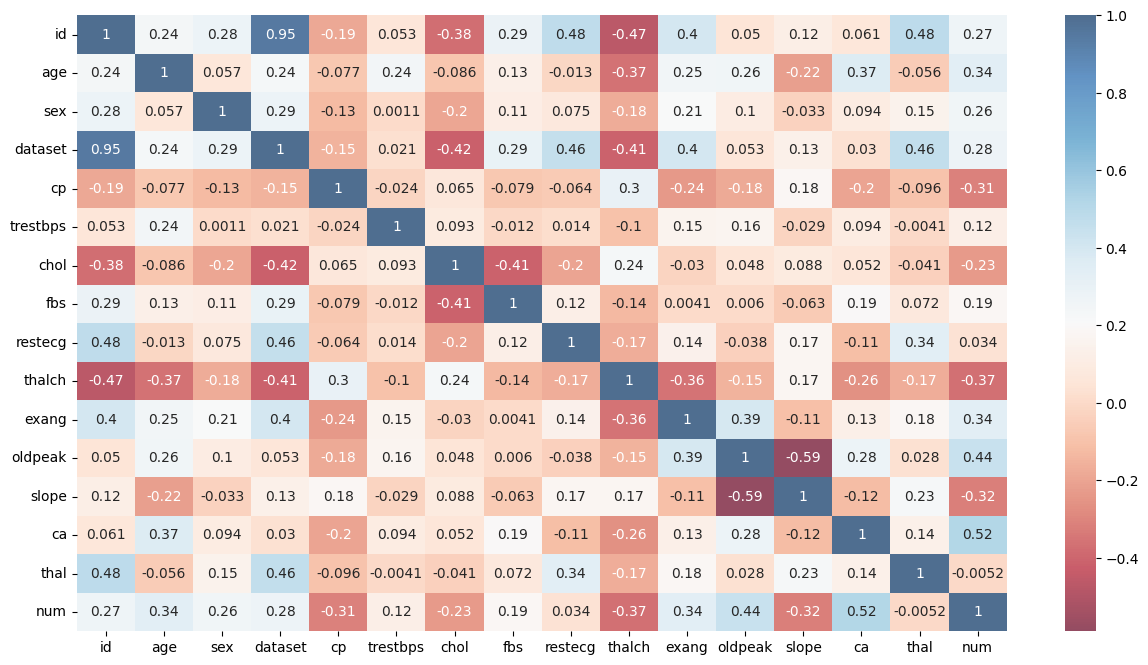

In [ ]:
# plot correlation matrix after converting categorical columns to numerical
# convert categorical columns to numerical using label encoding
df2 = df.copy()
sns.set_palette("pastel")
cat_cols = df2.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    df2[col] = LabelEncoder().fit_transform(df2[col])


correlation_matrix = df2.corr()
sort_corr_features = correlation_matrix.index
#plot correlation matrix
plt.figure(figsize=(15, 8))
sns.heatmap(df2[sort_corr_features].corr(), annot=True, cmap='RdBu', alpha=0.7, square=False)
plt.show()

In [ ]:
# calculate the correlation of each feature with the target variable and sort in descending order
correlation = correlation_matrix['num'].sort_values(ascending=False)
print_heading('Correlation of each feature with the target variable')
correlation

--------------------------------------------------
CORRELATION OF EACH FEATURE WITH THE TARGET VARIABLE
--------------------------------------------------


num         1.000000
ca          0.516216
oldpeak     0.443084
age         0.339596
exang       0.338166
dataset     0.276203
id          0.273552
sex         0.259342
fbs         0.186664
trestbps    0.122291
restecg     0.034255
thal       -0.005170
chol       -0.231547
cp         -0.314518
slope      -0.318383
thalch     -0.366265
Name: num, dtype: float64

# 1.5.1. Observations
High positive coefficients (e.g., ca, oldpeak, age, exang) suggest that as these feature values increase, the likelihood of an increase in num is higher, indicating a strong direct relationship. Conversely, high negative coefficients (e.g., cp, slope, thalach) suggest that as these features increase, the value of num is likely to decrease, indicating a strong inverse relationship. I will dive deep into this later.

# 1.6. Historgram of all features

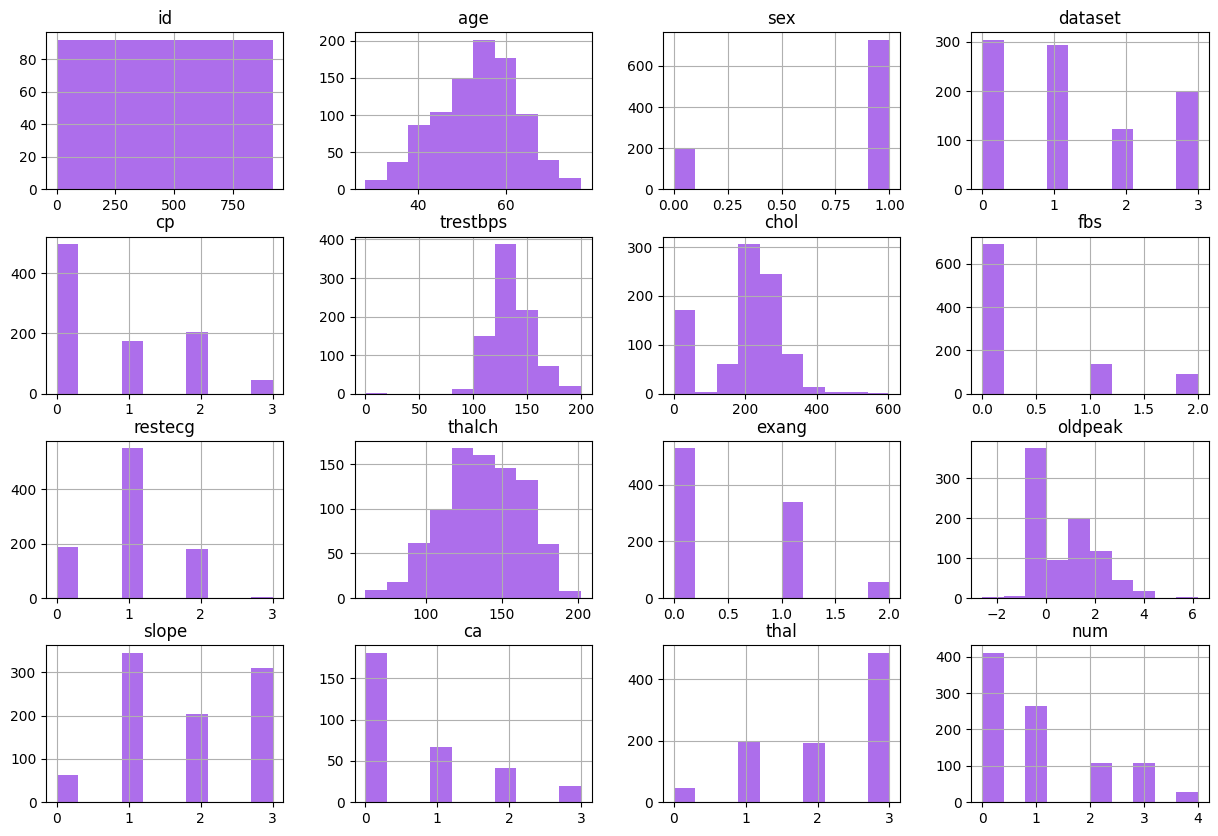

In [ ]:
# plot histogram of all columns using sns
df2.hist(figsize=(15, 10), color='#8B30E3', alpha=0.7)

plt.show()


# 1.7. Histograms of Selected Clinical Attributes (Continous Numerical) Grouped by Target Category

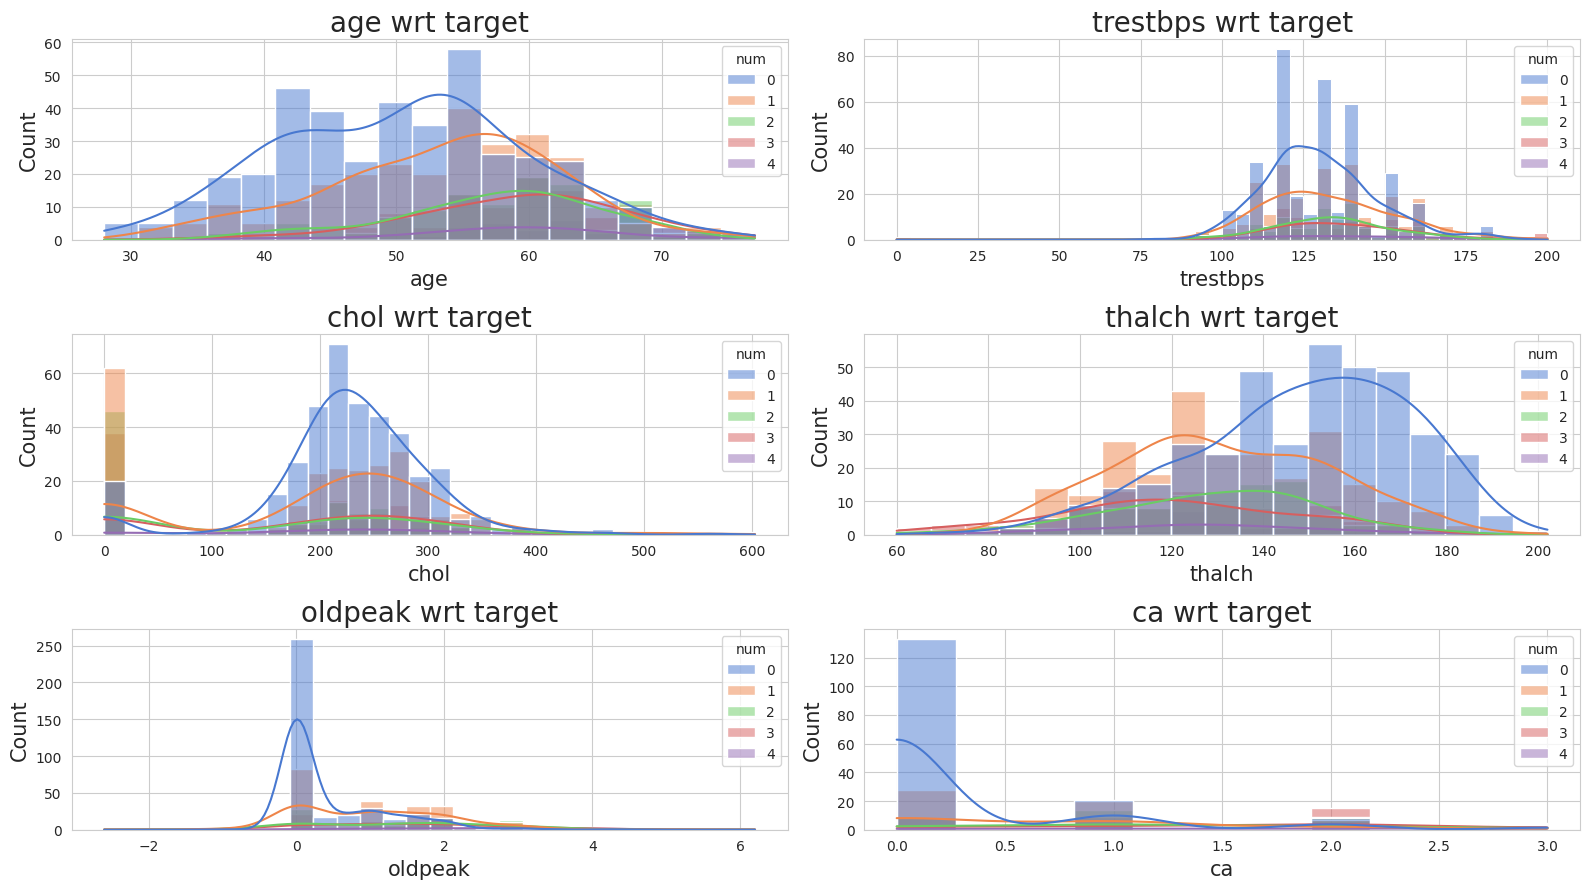

In [ ]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Define your color palette
color_palette = sns.color_palette("muted", len(df['num'].unique()))

# Specify the columns you want to plot manually
columns = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']

# Calculate the number of rows needed based on the number of specified columns
num_plots = len(columns)  # The actual number of plots you want to create
num_rows = (num_plots + 1) // 2  # Add 1 to ensure that we have enough rows for all columns

# Set up the matplotlib figure grid
fig, axes = plt.subplots(num_rows, 2, figsize=(16, num_rows * 3))  # Adjust the size as needed
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Iterate over the specified columns to create individual plots
for i, column in enumerate(columns):
    sns.histplot(data=df, x=column, kde=True, hue='num', palette=color_palette, ax=axes[i])
    axes[i].set_title(f'{column} wrt target', fontsize=20)
    axes[i].set_xlabel(column, fontsize=15)
    axes[i].set_ylabel('Count', fontsize=15)

# Remove any excess subplots if the number of specified columns is odd
if num_plots % 2 != 0:
    fig.delaxes(axes[-1])

# Adjust layout for better fit and to reduce any overlapping
plt.tight_layout()
plt.show()

# 1.8. How strongly do the independent variables predict the dependent or target variable 'num'?

I will be analyzing the relationship between the independent categorical variables and the dependent variable 'num'. I will now investigate whether there is a statistically significant association between the `independent catergorical variables (X)` and the `dependent variable 'num' (Y)`, and to understand the nature of their relationship.


1.8.1. Descriptive Statistics of Heart Disease Severity by Fasting Blood Sugar (fbs) Levels

In [ ]:
# Group 'fbs' column and provide descriptive statistics for the 'num' column within each group.
df.groupby('fbs')['num'].describe()


,count,mean,std,min,25%,50%,75%,max
fbs,,,,,,,,
False,692.0,0.868497,1.117570,0.0,0.0,0.0,1.0,4.0
True,138.0,1.347826,1.218184,0.0,0.0,1.0,2.0,4.0


1.8.3.  Descriptive Statistics of Heart Disease Outcomes by Exercise-Induced Angina

In [ ]:
# Group 'exang' column and provide descriptive statistics for the 'num' column within each group.
df.groupby('exang')['num'].describe()

,count,mean,std,min,25%,50%,75%,max
exang,,,,,,,,
False,528.0,0.623106,0.997148,0.0,0.0,0.0,1.0,4.0
True,337.0,1.522255,1.107447,0.0,1.0,1.0,2.0,4.0


1.8.4. Descriptive Statistics of Heart Disease Outcomes by ST Slope

In [ ]:
# Group 'slope' column and provide descriptive statistics for the 'num' column within each group.
df.groupby('slope')['num'].describe()

,count,mean,std,min,25%,50%,75%,max
slope,,,,,,,,
downsloping,63.0,1.746032,1.319436,0.0,1.0,2.0,3.0,4.0
flat,345.0,1.353623,1.108710,0.0,1.0,1.0,2.0,4.0
upsloping,203.0,0.689655,1.042294,0.0,0.0,0.0,1.0,4.0


1.8.5. Descriptive Statistics of Heart Disease Outcomes by Number of Major Vessels

In [ ]:
# Group 'ca' column and provide descriptive statistics for the 'num' column within each group.
df.groupby('ca')['num'].describe()

,count,mean,std,min,25%,50%,75%,max
ca,,,,,,,,
0.0,181.0,0.453039,0.903237,0.0,0.0,0.0,1.00,4.0
1.0,67.0,1.298507,1.180844,0.0,0.0,1.0,2.00,4.0
2.0,41.0,1.902439,1.241066,0.0,1.0,2.0,3.00,4.0
3.0,20.0,2.300000,1.417930,0.0,1.0,2.5,3.25,4.0


# 1.8.5.1. What do the descriptive statistics reveal about the behavior of 'num' across the various levels of 'ca'? Are there observable trends suggesting a relationship?

In the context of statistical analysis, where `'num'` is the dependent variable (Y) and `'ca'` is one of the independent variables (X). As we know from the correlation matrix that there exists a strong correlation between these two. Futhermore, the above table suggests the following relationship between X ('ca') and Y ('num'):

- For `X = 0.0`: The mean of Y is approximately `0.45`, which suggests a tendency for Y to be closer to 0 when X is 0.
- For `X = 1.0`: The mean of Y increases to about `1.3`. This indicates that when X is 1, the average value of Y is higher, suggesting a possible positive association.
- For `X = 2.0`: The mean of Y is roughly `1.90`, which further suggests that as X increases, there is a trend toward higher values` of Y.
- For `X = 3.0`: The mean of Y is the highest at `2.30` among the groups, indicating a potential trend where higher values of X are associated with higher values of Y.

The pattern of increasing mean values of Y with higher values of X confirms a positive correlation between the independent variable 'ca' and the dependent variable 'num'. However, establishing the strength and significance of this relationship would require additional statistical testing.

The 25th, 50th (median), and 75th percentiles provide a deeper understanding of Y's distribution for each category of X. Notably, for X values of `2.0` and `3.0`, at least `75%` of the observations result in Y being `3.0` and `3.25` suggesting higher heart disease detection.

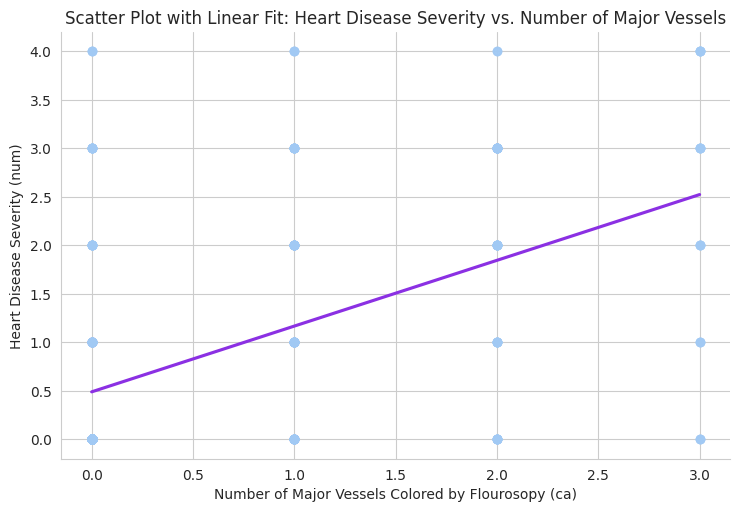

In [ ]:
# Create a plot with a linear fit to show any trends between 'ca' and 'num'.
sns.lmplot(x='ca', y='num', data=df, aspect=1.5, ci=None, order=1,  line_kws={'color': '#8B30E3'})

plt.title('Scatter Plot with Linear Fit: Heart Disease Severity vs. Number of Major Vessels')
plt.xlabel('Number of Major Vessels Colored by Flourosopy (ca)')
plt.ylabel('Heart Disease Severity (num)')

plt.show()

# 1.8.5.2. Plotting Violin graph of Heart Disease Severity by Number of Major Vessels

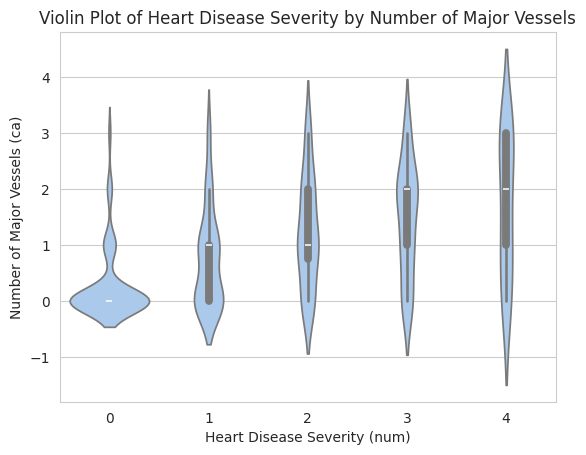

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the violin plot

sns.violinplot(x='num', y='ca', data=df)
# Set the title and labels
plt.title('Violin Plot of Heart Disease Severity by Number of Major Vessels')
plt.ylabel('Number of Major Vessels (ca)')
plt.xlabel('Heart Disease Severity (num)')

# Display the plot
plt.show()

# 1.8.5.2.1. **Observation**:
Each 'violin' represents one `'ca'` category and shows the distribution of `'num'` values. The width of the violin at different 'num' values indicates the density of the data, giving a visual sense of the distribution. The white dot represents the median, and the thick bar in the center of the violin indicates the interquartile range.

# **2.0. Data Preprocessing**

# 2.1. Can Cholestrol be zero?

Cholesterol is a critical component of cell membranes and is necessary for the production of certain hormones and vitamin D. A zero cholesterol level in the blood is **medically impossible** because it is essential for basic cellular functions and overall bodily health. The absence of cholesterol would result in cellular dysfunction and is incompatible with life.

Reference:
American Heart Association. (n.d.). What Is Cholesterol? Retrieved January 15, 2024,
[What is Cholestrol?](https://www.heart.org/en/health-topics/cholesterol/about-cholesterol)

# 2.1.0. Dealing with Zero Values in Cholesterol Data: A Strategy for Data Integrity

In [ ]:
# Check for all zero cholestrol values
len(df[df['chol'] == 0])
# calculate the percentage of zero values in the column
zero_percentage = len(df[df['chol'] == 0]) / df.shape[0] * 100
print_heading("Percentage of zero Cholesterol values: {:.2f}%".format(zero_percentage))

--------------------------------------------------
PERCENTAGE OF ZERO CHOLESTEROL VALUES: 18.70%
--------------------------------------------------


# 2.1.1. Strategy of Dealing with Cholesterol missing values

In my analysis of the Cholestrol data, I've identified zero values in the cholesterol column, which are biologically implausible and indicate potential issues with data collection or entry. Cholesterol, a crucial biomarker for cardiovascular health, cannot be zero in living individuals as it is vital for cell membrane structure and hormone synthesis (Reference - [What is Cholestrol?](https://www.heart.org/en/health-topics/cholesterol/about-cholesterol)). To maintain the integrity of the dataset and the validity of subsequent analyses, I will address these zero values by replacing them with NaN (Not a Number). This approach flags these entries as missing data, allowing for appropriate handling during the data cleaning process. This strategy ensures that statistical calculations and machine learning models are not skewed by these inaccurately recorded values.

I will be dealing with the missing values for Cholestrol feature later in the missing value imputation section.

In [ ]:
# calculate the percentage of missing values in the column
missing_percentage = df['chol'].isnull().sum() / df.shape[0] * 100
missing_percentage = round(missing_percentage, 2)
print_heading("Percentage of missing Cholesterol values: {:.2f}%".format(missing_percentage))

--------------------------------------------------
PERCENTAGE OF MISSING CHOLESTEROL VALUES: 3.26%
--------------------------------------------------


In [ ]:
# replace zero values with NaN in cholestrol column
df['chol'] = df['chol'].replace(0, np.nan)

In [ ]:
# calculate the percentage of missing values in the column
missing_percentage = df['chol'].isnull().sum() / df.shape[0] * 100
missing_percentage = round(missing_percentage, 2)
print_heading("Percentage of missing Cholesterol values: {:.2f}%".format(missing_percentage))

--------------------------------------------------
PERCENTAGE OF MISSING CHOLESTEROL VALUES: 21.96%
--------------------------------------------------


# 2.2. What happens if we don't handle missing values?

# 2.2.1. What are missing values?
Missing values are defined as the data points in the dataset that are not present or have not been recorded. They can occur due to various reasons such as errors in data collection, failure to fill in a value, or when an observation is not applicable or available.

If missing values are not handled, it can lead to skewed or incorrect analysis results because many algorithms cannot process `undefined` or `missing` or `unpresentable` values and may produce errors. Additionally, models trained on incomplete data may be biased or less accurate, undermining the reliability of predictions or inferences drawn from the dataset.

# 2.2.2. Identifying Missing values
Before addressing the missing values, it’s crucial to identify them within the dataset. This section focuses on techniques for detecting missing values via using descriptive statistics and visualization tools to summarize and highlight the presence of NaN values.

In [ ]:
# Displaying the percentages of the missing values in each column
print_heading("Percentage of missing values in each column")
feature_percent = round(((df.isnull().sum() / len(df)) * 100 ).sort_values(ascending=False),2)

# add % sympbol
feature_percent = feature_percent.astype(str) + '%'
feature_percent


--------------------------------------------------
PERCENTAGE OF MISSING VALUES IN EACH COLUMN
--------------------------------------------------


ca          66.41%
thal        52.83%
slope       33.59%
chol        21.96%
fbs          9.78%
oldpeak      6.74%
trestbps     6.41%
thalch       5.98%
exang        5.98%
restecg      0.22%
id            0.0%
age           0.0%
sex           0.0%
dataset       0.0%
cp            0.0%
num           0.0%
dtype: object

# 2.2.3. Observation:
The dataset exhibits significant missingness, particularly in the `'ca' and 'thal'` columns, with `66.41% and 52.83%` of their values missing, respectively. Other attributes with notable missing data include `'slope' (33.59%)`, `'fbs' (9.78%)`, and `'oldpeak' (6.74%)`, while many other features have no missing values. Moreover, the missing values in `chol` are increased from `3.26%` to `21.96%` as we have converted the `18.70%` of the zero values to missing values in the previous section.

# 2.2.4. Ploting heatmap for missing values

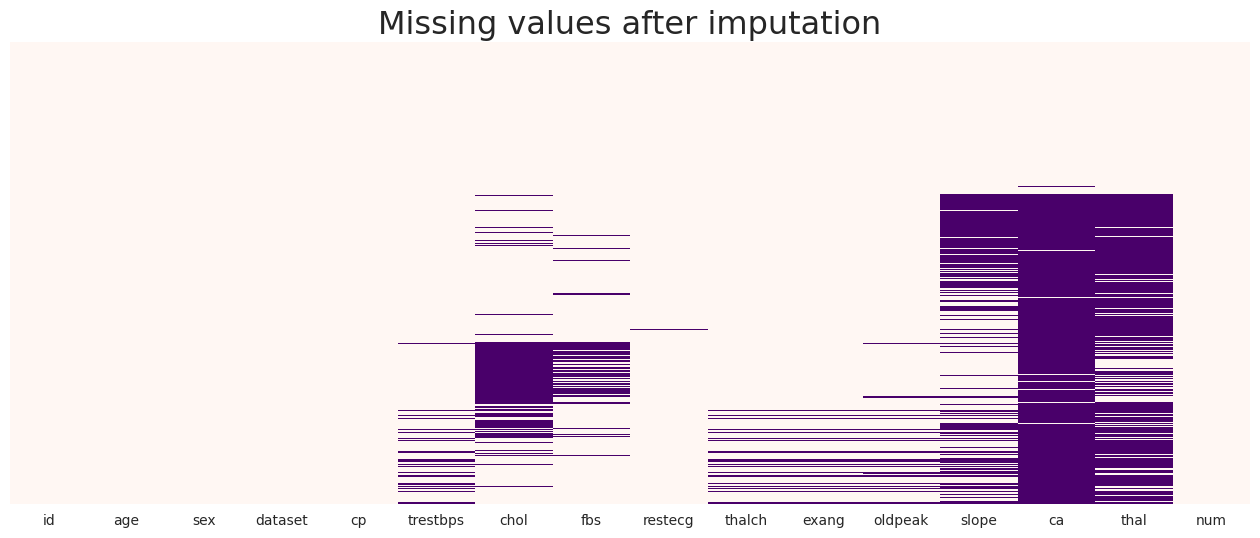

In [ ]:
# create heatmap to check missing values after imputation
plt.figure(figsize=(16, 6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='RdPu')
plt.title('Missing values after imputation', size=23)
plt.show()

# 2.3.3. Applying the SimpleImputer and KNN Imputer method to handle smaller percentages of missing values

# 2.3.3.1 KNNImputer on Cholstrol with 18% missing values

In [ ]:
# Import KNNImputer from sklearn.impute
from sklearn.impute import KNNImputer

# Initialize KNNImputer with 5 nearest neighbors
imputer = KNNImputer(n_neighbors=5)

# Use KNNImputer to fill missing values in 'chol' column
df['chol'] = imputer.fit_transform(df[['chol']])

# Convert 'chol' column to integer type
df['chol'] = df['chol'].astype(int)

# 2.3.3.2. SimpleImputer on the features with less than 10% missing values

In [ ]:
# Automatically find numerical and categorical columns with missing values less than 10%
missing_threshold = 10  # 10% threshold for missing values
total_entries = len(df)
target_variable = 'num'

# list of numerical columns that have less than a certain threshold of missing values and are not the target variable.
numerical_cols = [
    col
    for col in df.columns
    if (
        (df[col].dtype in ['int64', 'float64']) and
        (df[col].isnull().sum() / total_entries * 100) < missing_threshold  and
        (col != target_variable)

    )
]

# list of numerical columns that have less than a certain threshold of missing values
categorical_cols = [col
                   for col in df.columns
                   if (
                        df[col].dtype == 'object') and
                        (df[col].isnull().sum() / total_entries * 100) < missing_threshold]

# Apply simple imputation to numerical and categorical columns
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

for col in numerical_cols:
    df.loc[:,col] = num_imputer.fit_transform(df[[col]])

for col in categorical_cols:
    df.loc[:, col] = cat_imputer.fit_transform(df[[col]])

print_heading('Observations from missing values after imputation'.upper())

# Confirm there are no missing values left
missing_values_sum = df[df.columns.difference(['thal', 'ca', 'slope'])].isnull().sum()

print(f"The sum of all missing values, excluding features ['thal', 'ca', 'slope'], is:\n{missing_values_sum}"  + "\n")
print_heading('High missing values features'.upper())

# Display the features with missing values
print(f"The sum of all high missing values where simple imputation wasn't used, is:\n{df[['thal', 'ca', 'slope']].isnull().sum()}")


--------------------------------------------------
OBSERVATIONS FROM MISSING VALUES AFTER IMPUTATION
--------------------------------------------------
The sum of all missing values, excluding features ['thal', 'ca', 'slope'], is:
age         0
chol        0
cp          0
dataset     0
exang       0
fbs         0
id          0
num         0
oldpeak     0
restecg     0
sex         0
thalch      0
trestbps    0
dtype: int64

--------------------------------------------------
HIGH MISSING VALUES FEATURES
--------------------------------------------------
The sum of all high missing values where simple imputation wasn't used, is:
thal     486
ca       611
slope    309
dtype: int64


# 2.3.4. Heatmap for missing values

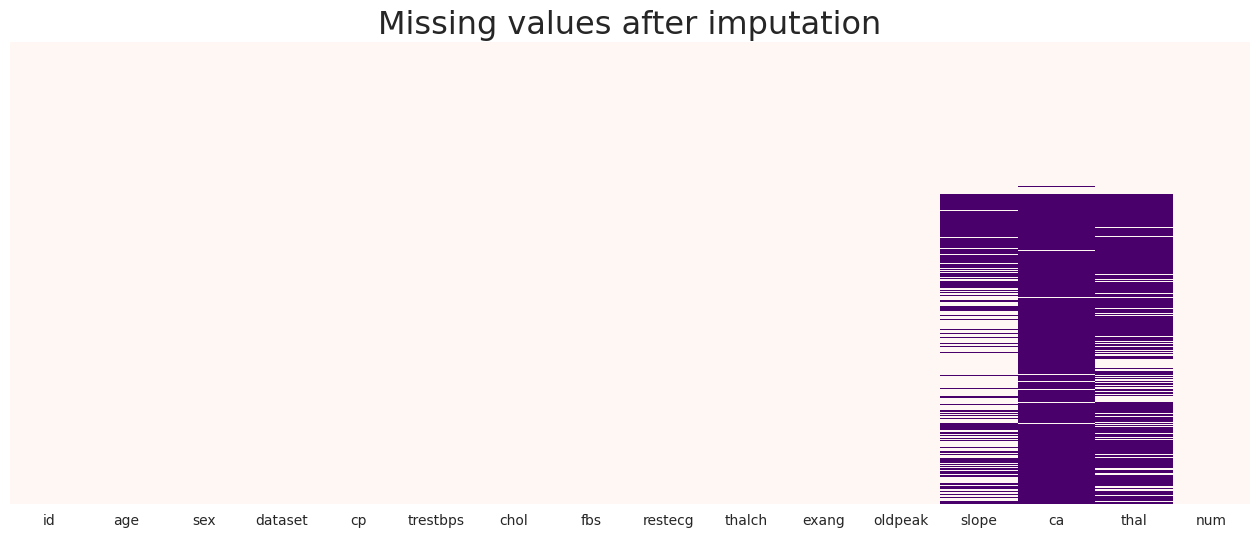

In [ ]:
# create heatmap to check missing values after imputation
plt.figure(figsize=(16, 6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='RdPu')
plt.title('Missing values after imputation', size=23)
plt.show()

# 2.3.5. Observation
Currently, only three variables remain with a substantial proportion of missing values. As mentionned above, to address this, I will employ the `Random Forest algorithm` to estimate the missing data. By training a model specifically for this purpose, I aim to predict the missing entries that exhibit high rates of absence. Once predictions are made, I will integrate these estimations back into the DataFrame to complete the imputation process.
# 2.3.6. Strategy
I plan to tackle the imputation of missing values in features that have a significant amount of data missing by leveraging the `Random Forest algorithm`. My strategy is to divide the dataset into two subsets: the first will consist of records without missing values, and the second will contain the instances with missing values in the pertinent features. I will utilize the first subset to train the Random Forest model. Once the model is adequately trained, I will apply it to the second subset, which has the missing values, to predict those values. Finally, I will merge these predictions back into the original dataset, thereby replacing the missing entries with the imputed values.

Here are the steps:

1. Separate the Data: Split your dataset into two subsets:
    - Subset A: Rows without any missing values in the high-missing-rate features.
    - Subset B: Rows with missing values in those particular features.
  
2. Train the Model: Use Subset A to train the Random Forest model. The features with complete data will be used as predictors, while the feature you're imputing will be the target variable.

3. Predict Missing Values: Apply the trained Random Forest model to Subset B to predict the missing values. Only use the rows with missing values for the prediction to fill in the gaps.

4. Impute the Data: Take the predictions for the missing values and use them to impute the missing data in Subset B. This step merges the predicted values back into the original dataset.

5. Recombine the Data: Concatenate Subset A and the now imputed Subset B to reconstruct the complete dataset with all the previously missing values imputed.



In [ ]:
# split the dataset into two subset with one contaning complete data and the other containing
# missing data for thal, ca, and slope. these dataset should still have all the columns in the result.
# create a new dataframe which removes all the rows that nan values
df_clean = df.dropna()

# create a new dataframe which contains all the rows that have nan values
df_missing = df[df.isna().any(axis=1)]

print_heading('Complete data with no missing values'.upper())
print(f"The shape of the complete dataframe is: {df_clean.shape}")
print("\n")
print_heading('Missing data with high missing values'.upper())
print(f"The shape of the dataframe with missing values is: {df_missing.shape}")

--------------------------------------------------
COMPLETE DATA WITH NO MISSING VALUES
--------------------------------------------------
The shape of the complete dataframe is: (299, 16)


--------------------------------------------------
MISSING DATA WITH HIGH MISSING VALUES
--------------------------------------------------
The shape of the dataframe with missing values is: (621, 16)


# 2.4. Applying Random Forest Algorithm to train the model

In [ ]:
# Training and evaluating the model for the target variables 'slope', 'thal', and 'ca'.
def predict_and_evaluate(target_variable, drop_columns):
    # Drop specified columns from the DataFrame
    X = df_clean.drop(drop_columns, axis=1)

    # Select target variable(s)
    y = df_clean[target_variable]

    # Initialize LabelEncoder
    le = LabelEncoder()

    #le = OneHotEncoder()
    for col in X.columns:
        # If column is of object type
        if X[col].dtype == 'object':
            # Encode the column
            X[col] = le.fit_transform(X[col])

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize RandomForestClassifier
    model = RandomForestClassifier(n_estimators=10, random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Print heading
    print_heading(f'Model performance for {target_variable}'.upper())

    # Print accuracy score
    print(f"The accuracy of the model is: {round(accuracy_score(y_test, y_pred),2)}")

    # Print classification report
    print(f"Classification report:\n {classification_report(y_test, y_pred)}")

    # Return the trained model
    return model

In [ ]:
# create a new dataframe and drop the target variables
df_encoded_pred = df_missing.drop(['slope', 'ca', 'thal'], axis=1)

In [ ]:
# Train and evaluate a model for predicting the 'slope' feature, excluding 'slope', 'ca', and 'thal' from the input features.
rf_model_slope  = predict_and_evaluate('slope', ['slope', 'ca', 'thal'])

--------------------------------------------------
MODEL PERFORMANCE FOR SLOPE
--------------------------------------------------
The accuracy of the model is: 0.72
Classification report:
               precision    recall  f1-score   support

 downsloping       0.00      0.00      0.00         3
        flat       0.70      0.76      0.73        25
   upsloping       0.75      0.75      0.75        32

    accuracy                           0.72        60
   macro avg       0.48      0.50      0.49        60
weighted avg       0.69      0.72      0.70        60



In [ ]:
# Train and evaluate a model for predicting the 'ca' feature, excluding 'ca', and 'thal' from the input features.
rf_model_ca = predict_and_evaluate('ca', [ 'ca', 'thal'])

--------------------------------------------------
MODEL PERFORMANCE FOR CA
--------------------------------------------------
The accuracy of the model is: 0.72
Classification report:
               precision    recall  f1-score   support

         0.0       0.76      0.97      0.86        40
         1.0       0.67      0.15      0.25        13
         2.0       0.33      0.40      0.36         5
         3.0       0.00      0.00      0.00         2

    accuracy                           0.72        60
   macro avg       0.44      0.38      0.37        60
weighted avg       0.68      0.72      0.66        60



In [ ]:
# # Train and evaluate a model for predicting the 'thal' feature.
rf_model_thal = predict_and_evaluate('thal', ['thal'])

--------------------------------------------------
MODEL PERFORMANCE FOR THAL
--------------------------------------------------
The accuracy of the model is: 0.7
Classification report:
                    precision    recall  f1-score   support

     fixed defect       0.00      0.00      0.00         4
           normal       0.67      0.94      0.78        31
reversable defect       0.76      0.52      0.62        25

         accuracy                           0.70        60
        macro avg       0.48      0.49      0.47        60
     weighted avg       0.67      0.70      0.66        60



The prediction's accuracy falls between 70% and 72%, which, in my opinion, is fairly decent.

# 2.7. Missing Value Prediction from Trained models

In [ ]:
def encode_and_predict(df, target_variable, model):

    # Initialize label encoder
    le = LabelEncoder()

    # Loop through each column in the DataFrame
    for col in df.columns:
        # Check if the column is of type 'object' (categorical)
        if df[col].dtype == 'object':
            # encode the categorical data to integers
            df[col] = le.fit_transform(df[col])
    # Use the model to apply predictions and assign the predicted values to the target variable
    df[target_variable] = model.predict(df)



  # 2.7.1. Predicting missing values for ca, slope and thal variables

In [ ]:
# Encode categorical features and predict the 'slope' column in df_encoded_pred
encode_and_predict(df_encoded_pred, 'slope', rf_model_slope)
# Update the 'slope' column in df_missing with the predicted values
df_missing.loc[:,'slope'] = df_encoded_pred['slope']

df_encoded_pred = df_missing.drop(['ca', 'thal'], axis=1)
# Encode categorical features and predict the 'ca' column in df_encoded_pred
encode_and_predict(df_encoded_pred, 'ca', rf_model_ca)
# Update the 'ca' column in df_missing with the predicted values
df_missing.loc[:, 'ca'] = df_encoded_pred['ca']

df_encoded_pred = df_missing.drop(['thal'], axis=1)
# Encode categorical features and predict the 'thal' column in df_encoded_pred
encode_and_predict(df_encoded_pred, 'thal', rf_model_thal)
# Update the 'thal' column in df_missing with the predicted values
df_missing.loc[:, 'thal'] = df_encoded_pred['thal']


# 2.7.2. Merging the datasets

In [ ]:
# merge df_clean and df_missing
df = pd.concat([df_clean, df_missing])

print_heading('Dataset shape inspect'.upper())
print(f"The shape of the dataset is: {df.shape[0]} rows and {df.shape[1]} columns.")

--------------------------------------------------
DATASET SHAPE INSPECT
--------------------------------------------------
The shape of the dataset is: 920 rows and 16 columns.


# 2.7.3. Verification of the trained model

In [ ]:
# Display the missing values if any in the dataset for verification
print_heading('Missing values inspect'.upper())
if df.isnull().sum().sum() == 0:
    print("There are no missing values in the dataset.")
else:
    print("There are missing values in the dataset.")

--------------------------------------------------
MISSING VALUES INSPECT
--------------------------------------------------
There are no missing values in the dataset.


# 2.8. Heatmap for verifying that the dataset is clean.

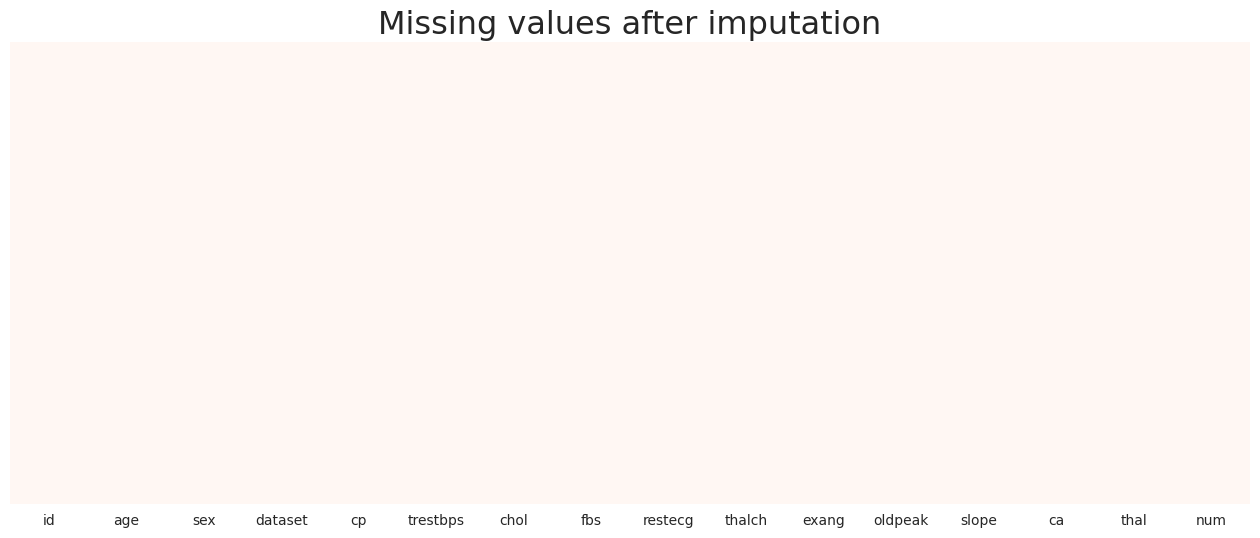

In [ ]:
# create heatmap to check missing values after imputation
plt.figure(figsize=(16, 6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='RdPu')
plt.title('Missing values after imputation', size=23)
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# min max scaling to scale the thalch ca chol and tresbps columns
def scale_columns(df, columns):

    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()

    for column in columns:
        df[column] = scaler.fit_transform(df[[column]])

    return df

df = scale_columns(df, ['thalch', 'chol', 'trestbps', 'ca'])



# 3.3. Plotting Historgram and Boxplot

In [ ]:
# Plotting the histogram and boxplot to check the data distribution for the numerical columns
def plot_histogram_and_boxplot(df, numerical_cols, cyan_palette=["#9468F8"]):
    # Set to "dark" for a black background
    #sns.set(style="dark", palette="deep")
    shade = "#0000ff"
    # Set the figure size to accommodate the subplots
    plt.figure(figsize=(15, len(numerical_cols) * 5))

    # Loop through each numerical column and create a row with a histogram and a boxplot
    for i, col in enumerate(numerical_cols):
        # Histogram (left)
        ax1 = plt.subplot(len(numerical_cols), 2, 2*i + 1)
        sns.histplot(df[col], kde=True, bins=30, color='blue')
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        ax1.set_facecolor('#ffffff')

        # Boxplot (right)
        ax2 = plt.subplot(len(numerical_cols), 2, 2*i + 2)
        sns.boxplot(x=df[col], color=cyan_palette[0], linewidth=1.5,medianprops={'color': 'white', 'linewidth': 2},
                    flierprops=dict(markerfacecolor=shade, marker='o', markeredgecolor=shade, markersize=5),
                    whiskerprops=dict(color=shade, linewidth=2.0),
                    capprops=dict(color=shade, linewidth=2.0),
                    boxprops=dict(edgecolor=shade, linewidth=2.0)),

        plt.title(f'Boxplot of {col}')
        ax2.set_facecolor('#ffffff')

    # Adjust layout for better readability and display the plot
    plt.tight_layout()
    plt.show()

# 3.4. Power-law distribution

In [ ]:
df.oldpeak.describe()

count    920.000000
mean       0.853261
std        1.058049
min       -2.600000
25%        0.000000
50%        0.500000
75%        1.500000
max        6.200000
Name: oldpeak, dtype: float64

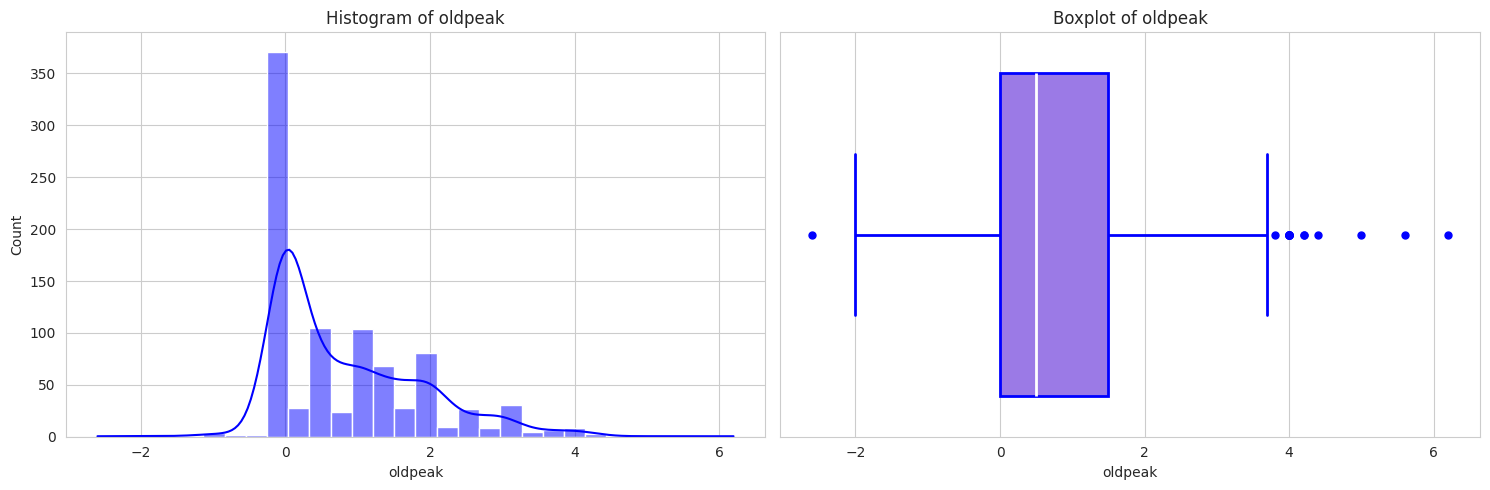

In [ ]:
plot_histogram_and_boxplot(df, ['oldpeak'])

# 3.5.1. Segmenting 'ST Depression - Oldpeak' Values into Quartile-Based Bins

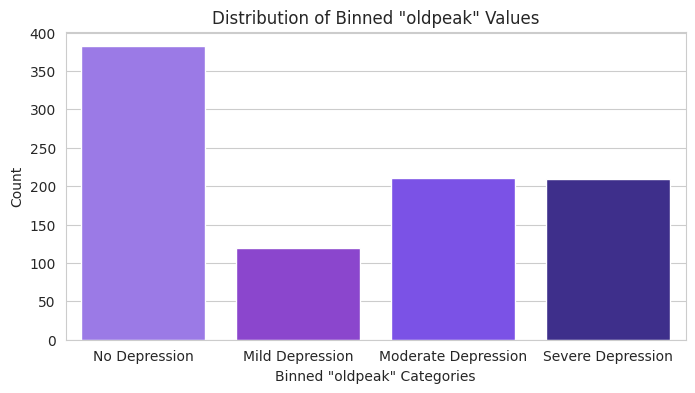

In [ ]:
# Define bin edges according to the quartiles.
bin_edges = [-2.6, 0.0, 0.5, 1.5, 6.2]
shades = ['#9468F8', '#8B30E3', '#7039FF', '#341F9B', '#9556EB']
# Define labels for the bins.
bin_labels = ['No Depression', 'Mild Depression', 'Moderate Depression', 'Severe Depression']

# Bin the 'oldpeak' data.
df['oldpeak_binned'] = pd.cut(df['oldpeak'], bins=bin_edges, labels=bin_labels, include_lowest=True)
oldpeak = df['oldpeak_binned']
df.drop('oldpeak_binned', axis=1, inplace=True)


# Plot the distribution of the binned data.
plt.figure(figsize=(8, 4))
sns.countplot(x=oldpeak, data=df, palette=shades)


plt.title('Distribution of Binned "oldpeak" Values')
plt.xlabel('Binned "oldpeak" Categories')
plt.ylabel('Count')

plt.show()

# 3.5.2. Stratigying 'ST depression - Oldpeak' levels through equal-width binning

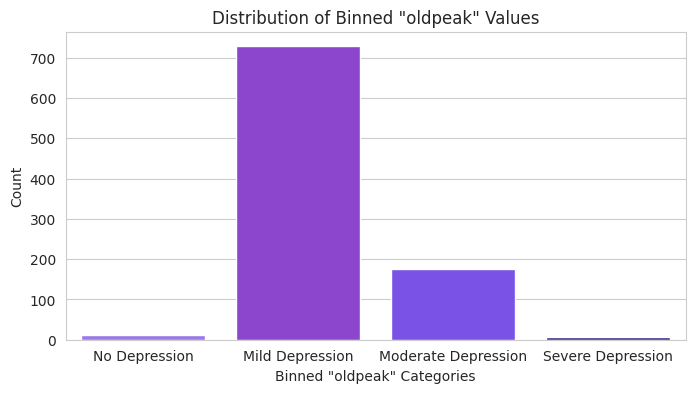

In [ ]:
# Define the number of bins
number_of_bins = 4
max_oldpeak = df.oldpeak.max()
min_oldpeak = df.oldpeak.min()
# Calculate the range of the data (max - min)
data_range = max_oldpeak - min_oldpeak

# Calculate the bin width
bin_width = data_range / number_of_bins

# Generate the bin edges
bin_edges = [min_oldpeak + i * bin_width for i in range(number_of_bins + 1)]
# Define labels for the bins.
bin_labels = ['No Depression', 'Mild Depression', 'Moderate Depression', 'Severe Depression']

# Bin the 'oldpeak' data.
df['oldpeak_binned'] = pd.cut(df['oldpeak'], bins=bin_edges, labels=bin_labels, include_lowest=True)
df['oldpeak'] = df['oldpeak_binned']
df.drop('oldpeak_binned', axis=1, inplace=True)


# Plot the distribution of the binned data.
plt.figure(figsize=(8, 4))
sns.countplot(x=df.oldpeak, data=df, palette=shades)


plt.title('Distribution of Binned "oldpeak" Values')
plt.xlabel('Binned "oldpeak" Categories')
plt.ylabel('Count')

plt.show()

In [ ]:
print_heading('Observations from oldpeak binned')
df['oldpeak'].value_counts()

--------------------------------------------------
OBSERVATIONS FROM OLDPEAK BINNED
--------------------------------------------------


Mild Depression        728
Moderate Depression    175
No Depression           11
Severe Depression        6
Name: oldpeak, dtype: int64

# 3.6.  Visualizing data distribution with Histogram and Boxplot

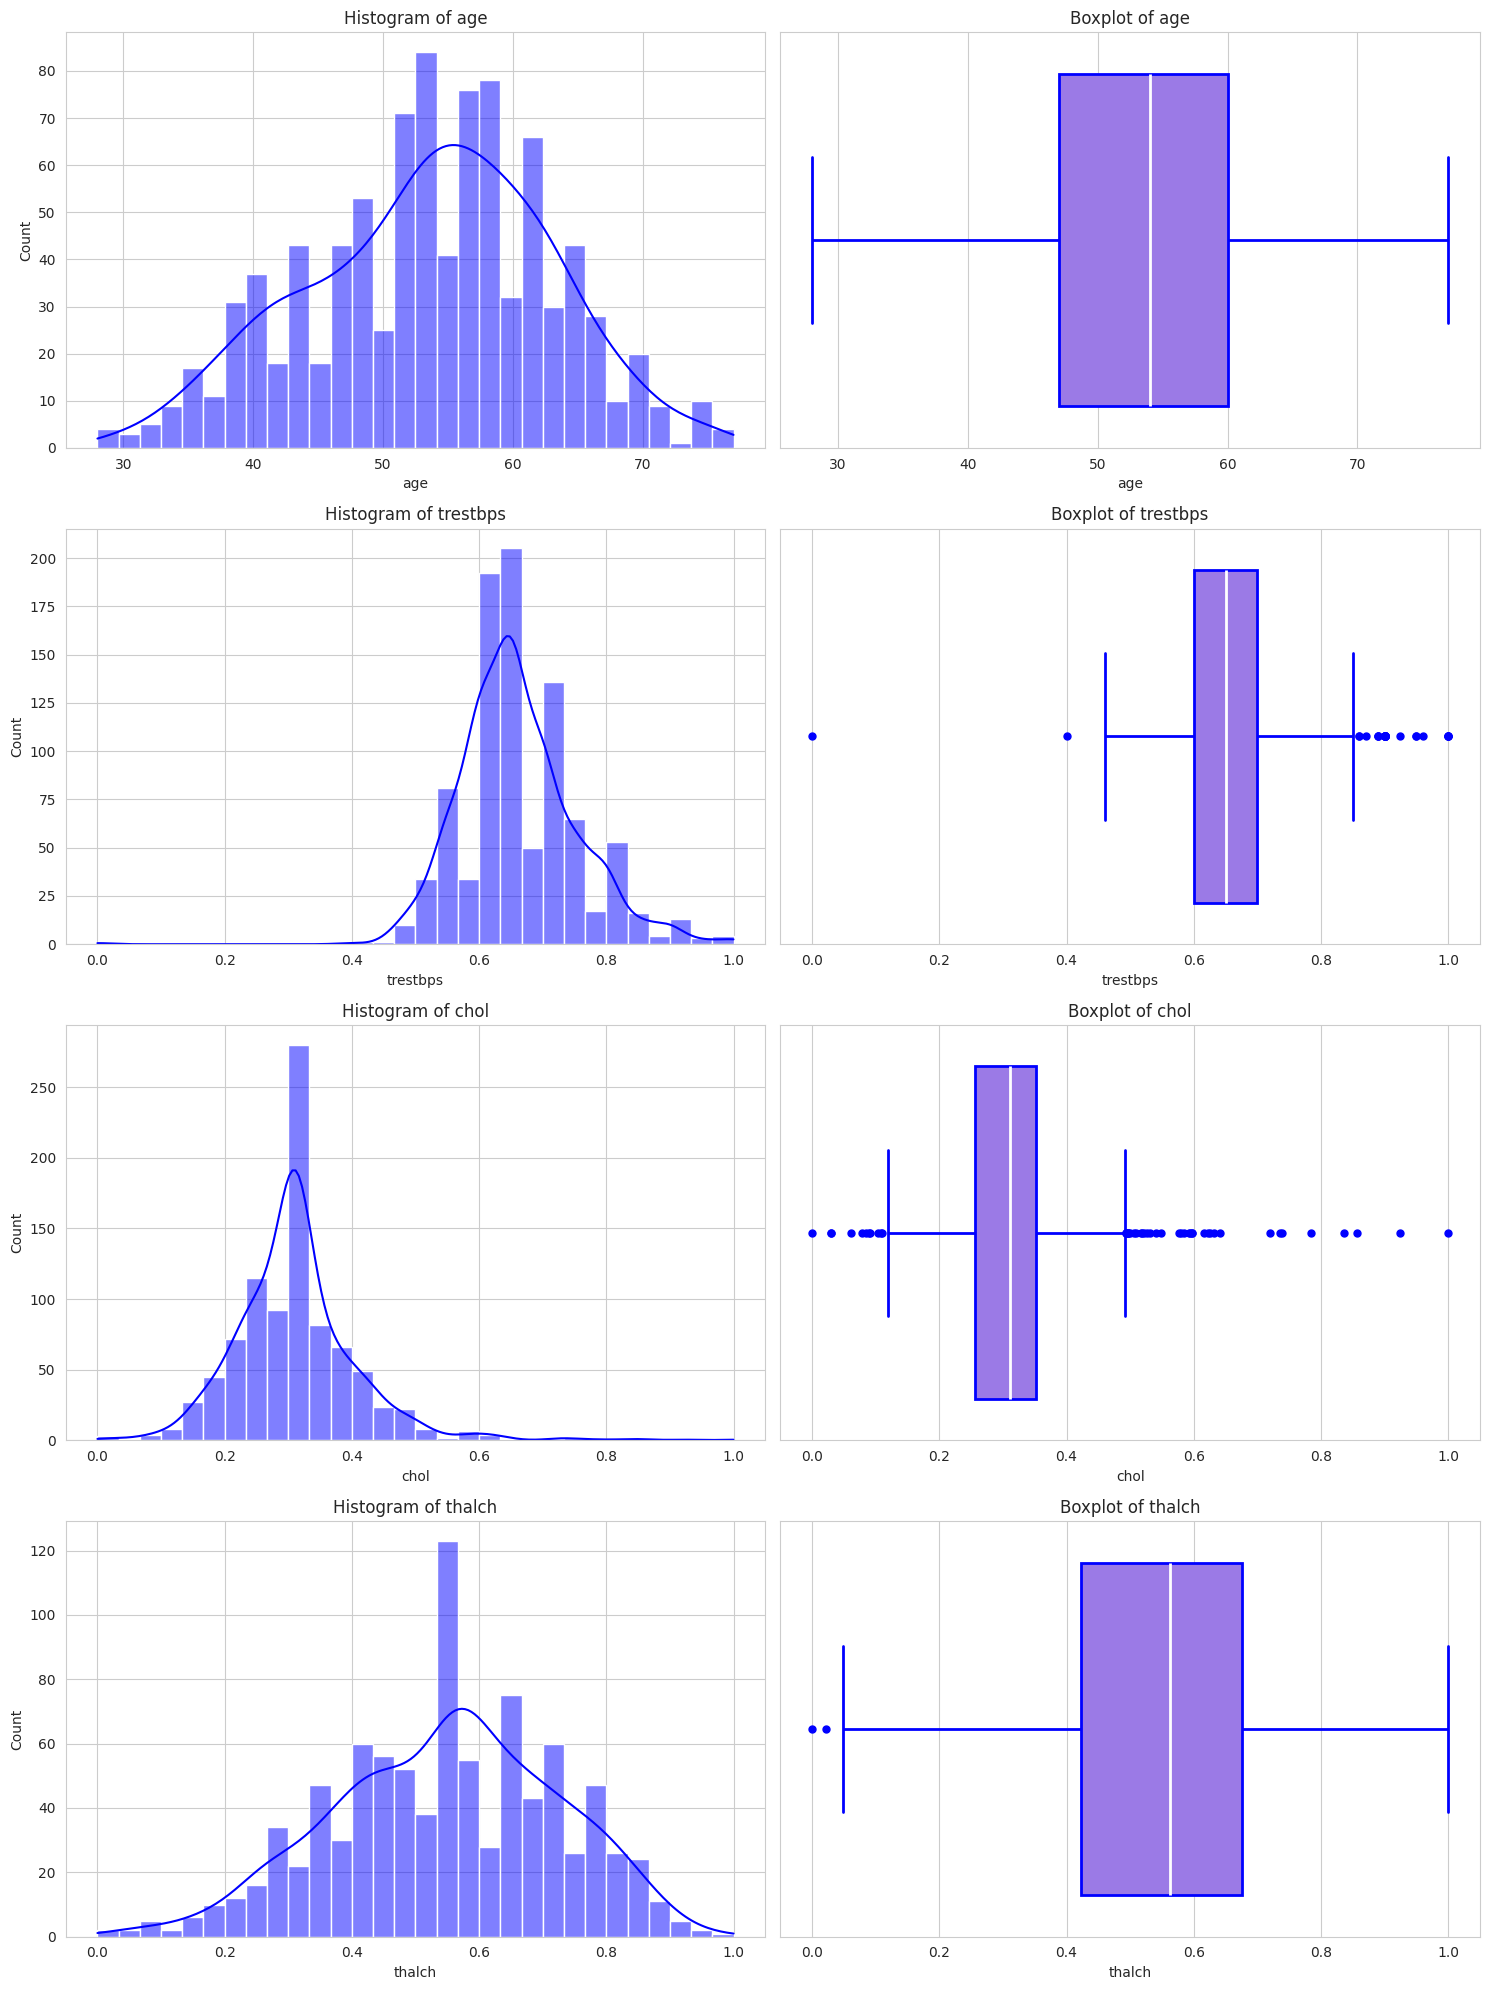

In [ ]:
# Remove id and old peak column from numerical_cols
numerical_cols.remove('id')
numerical_cols.remove('oldpeak')


# Plot histogram and boxplot for numerical columns before scaling
plot_histogram_and_boxplot(df, numerical_cols)

In [ ]:

# custom class for outlier detection
from sklearn.base import BaseEstimator, TransformerMixin
class OutlierDetector(BaseEstimator, TransformerMixin):
    def __init__(self, factor=1.5):
        self.factor = factor

    def fit(self, X, y=None):
        # calculate the bounds for each column
        self.bounds_ = {}
        for column in X.columns:
            Q1 = X[column].quantile(0.25)
            Q3 = X[column].quantile(0.75)
            IQR = Q3 - Q1
            self.bounds_[column] = {
                'lower': Q1 - self.factor * IQR,
                'upper': Q3 + self.factor * IQR
            }
        return self

    def transform(self, X):
        # we flag the outliers in each column
        X_outliers = pd.DataFrame(index=X.index)
        for column in X.columns:
            lower_bound = self.bounds_[column]['lower']
            upper_bound = self.bounds_[column]['upper']
            X_outliers[column] = ~X[column].between(lower_bound, upper_bound)
        return X_outliers



# 3.9. How and why I have transformed the multilabel target variable into a binary classification problem?

In [ ]:
# Get value count for the target variable
df['num'].value_counts()

0    411
1    265
2    109
3    107
4     28
Name: num, dtype: int64

In [ ]:
# Create a new column 'num_binary' in the dataframe 'df'.
# If 'num' is greater than or equal to 2, 'num_binary' is 1, otherwise 0.
df['num_binary'] = df['num'].apply(lambda x:1 if x >= 2 else 0)

# Replace the 'num' column with the 'num_binary' column
df['num'] = df['num_binary']

# Drop the 'num_binary' column as it is no longer needed
df.drop('num_binary', axis=1, inplace=True)

In [ ]:
# Get value count for the target variable
df['num'].value_counts()

0    676
1    244
Name: num, dtype: int64

In [ ]:
models = {
  'Logistic Regression': {
    'ID': 'LogisticRegression',
    'model': LogisticRegression(),
    'params': {
        'model__C': [1, 10],
        'model__penalty': ['l2'],
        'model__max_iter': [1000],
    },
},

'Support Vector Machine': {
    'ID': 'SVC',
    'model': SVC(),
    'params': {
        'model__C': [1, 10],
        'model__kernel': ['rbf'],
    },
},
   'AdaBoost Classifier': {
        'ID': 'AdaBoostClassifier',
        'model': AdaBoostClassifier(),
        'params': {
            'model__n_estimators': [10, 100]
        }
    },
  'XGBoost Classifier': {
    'ID': 'XGBClassifier',
    'model': XGBClassifier(),
    'params': {
        'model__max_depth': [3, 4],
        'model__learning_rate': [0.1, 0.2],
        'model__n_estimators': [50, 100],
        'model__gamma': [0, 0.1],
        'model__subsample': [0.8, 1.0],
        'model__colsample_bytree': [0.8, 1.0],
        'model__reg_alpha': [0],
        'model__reg_lambda': [1],
    },
  },
  'Decision Tree Classifier': {
    'ID': 'DecisionTreeClassifier',
    'model': DecisionTreeClassifier(),
    'params': {
        'model__criterion': ['gini', 'entropy'],
        'model__max_depth': [None, 3, 5, 10],
        'model__max_features': [None, 'sqrt', 'log2']
    },
},
'Random Forest Classifier': {
    'ID': 'RandomForestClassifier',
    'model': RandomForestClassifier(),
    'params': {
        'model__n_estimators': [10, 50],
        'model__max_depth': [None, 3, 5],
        'model__min_samples_split': [2, 4],
        'model__min_samples_leaf': [1, 2],
    },
},
  'K-Nearest Neighbors': {
    'ID': 'KNeighborsClassifier',
    'model': KNeighborsClassifier(),
    'params': {
        'model__n_neighbors': [3, 5],
        'model__weights': ['uniform', 'distance'],
        'model__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    },
},
'Gradient Boosting Classifier': {
    'ID': 'GradientBoostingClassifier',
    'model': GradientBoostingClassifier(),
    'params': {
        'model__n_estimators': [50, 100],
        'model__learning_rate': [0.1, 0.2],
        'model__max_depth': [3, 4],
        # 'model__min_samples_split': [2, 4],
        # 'model__min_samples_leaf': [1, 2],
        # 'model__subsample': [0.8, 1.0],
        'model__max_features': ['sqrt', 'log2', None]
    },
},
   'CatBoost Classifier': {
        'ID': 'CatBoostClassifier',
        'model': CatBoostClassifier(verbose=0),
        'params': {
            'model__iterations': [10, 100],
            'model__depth': [1, 2, 3, 4]
        }
    },
    'LGBM Classifier': {
        'ID': 'LGBMClassifier',
        'model': LGBMClassifier(),
        'params': {
            'model__n_estimators': [10, 100],
            'model__max_depth': [None, 1, 2, 3],
            'model__learning_rate': [0.1, 0.2, 0.3],
            'model__verbose': [-1]
        }
    },
    'GaussianNB': {
        'ID': 'GaussianNB',
        'model': GaussianNB(),
        'params': {}
    },

}

In [ ]:
def calculate_error_ratio(df, target_column, feature_column, test_size=0.2, random_state=42, stratify=None ):

    # Define features and target
    X = df.drop([target_column], axis=1)  # Features
    y = df[target_column]  # Target

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=stratify, test_size=test_size, random_state=random_state)

    # Calculate the percentage representation of feature_column in training and test sets
    train_percentages = X_train[feature_column].value_counts(normalize=True)*100
    test_percentages = X_test[feature_column].value_counts(normalize=True)*100

    # Calculate the error ratio
    error_ratio = abs(train_percentages - test_percentages)

    # Create a dataframe to compare the percentages
    compare_percentages = pd.DataFrame({
            "random_train %": train_percentages,
            "random_test %": test_percentages,
            "error_ratio %": error_ratio
            })

    # Print the representation of feature_column value in training and test sets before stratified sampling
    if stratify is None:
        print_heading(f'Representation of {feature_column} value in x_train and x_test before stratified Sampling'.upper())
    else:
        print_heading(f'Representation of {feature_column} value in x_train and x_test after stratified Sampling'.upper())
    compare_error_df = round(compare_percentages,2)
    return  X_train, X_test, y_train, y_test, compare_error_df

In [ ]:

X_train, X_test, y_train, y_test, compare_error_df = calculate_error_ratio(df, 'num', 'ca')
compare_error_df

--------------------------------------------------
REPRESENTATION OF CA VALUE IN X_TRAIN AND X_TEST BEFORE STRATIFIED SAMPLING
--------------------------------------------------


,random_train %,random_test %,error_ratio %
0.000000,76.09,77.17,1.09
0.333333,13.72,13.04,0.68
0.666667,7.47,8.70,1.22
1.000000,2.72,1.09,1.63


In [ ]:
X_train, X_test, y_train, y_test, compare_error_df = calculate_error_ratio(df, 'num', 'ca', stratify=df['ca'])
compare_error_df

--------------------------------------------------
REPRESENTATION OF CA VALUE IN X_TRAIN AND X_TEST AFTER STRATIFIED SAMPLING
--------------------------------------------------


,random_train %,random_test %,error_ratio %
0.000000,76.36,76.09,0.27
0.333333,13.59,13.59,0.00
0.666667,7.74,7.61,0.14
1.000000,2.31,2.72,0.41


I could have implemented the stratified sampling with the cross validation method but I choose to go with the above to test the results myself.

# **Preprocess khtm **

In [ ]:
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1.0,63.0,Male,Cleveland,typical angina,0.725,0.285714,True,lv hypertrophy,0.633803,False,Moderate Depression,downsloping,0.000000,fixed defect,0
1,2.0,67.0,Male,Cleveland,asymptomatic,0.800,0.388031,False,lv hypertrophy,0.338028,True,Mild Depression,flat,1.000000,normal,1
2,3.0,67.0,Male,Cleveland,asymptomatic,0.600,0.277992,False,lv hypertrophy,0.485915,True,Moderate Depression,flat,0.666667,reversable defect,0
3,4.0,37.0,Male,Cleveland,non-anginal,0.650,0.318533,False,normal,0.894366,False,Moderate Depression,downsloping,0.000000,normal,0
4,5.0,41.0,Female,Cleveland,atypical angina,0.650,0.229730,False,lv hypertrophy,0.788732,False,Mild Depression,upsloping,0.000000,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916.0,54.0,Female,VA Long Beach,asymptomatic,0.635,0.478764,True,st-t abnormality,0.661972,False,Mild Depression,flat,0.000000,normal,0
916,917.0,62.0,Male,VA Long Beach,typical angina,0.650,0.104247,False,st-t abnormality,0.563380,False,Mild Depression,flat,0.000000,reversable defect,0
917,918.0,55.0,Male,VA Long Beach,asymptomatic,0.610,0.266409,True,st-t abnormality,0.281690,False,Mild Depression,flat,0.333333,normal,1
918,919.0,58.0,Male,VA Long Beach,asymptomatic,0.650,0.579151,True,lv hypertrophy,0.563380,False,Mild Depression,flat,0.000000,normal,0


In [ ]:
dataset = df

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming you have a DataFrame called 'df' with the provided data
# Note: This is just a sample code, and you should adapt it to your actual DataFrame structure

# Create a label encoder
label_encoder = LabelEncoder()

# Convert categorical columns to numeric using label encoder
dataset['sex'] = label_encoder.fit_transform(dataset['sex'])
dataset['cp'] = label_encoder.fit_transform(dataset['cp'])
dataset['fbs'] = label_encoder.fit_transform(dataset['fbs'])
dataset['restecg'] = label_encoder.fit_transform(dataset['restecg'])
dataset['exang'] = label_encoder.fit_transform(dataset['exang'])
dataset['slope'] = label_encoder.fit_transform(dataset['slope'])
dataset['ca'] = label_encoder.fit_transform(dataset['ca'])
dataset['thal'] = label_encoder.fit_transform(dataset['thal'])
dataset['dataset'] = label_encoder.fit_transform(dataset['dataset'])
dataset['oldpeak'] = label_encoder.fit_transform(dataset['oldpeak'])

# Print the updated DataFrame
print(dataset)

        id   age  sex  dataset  cp  trestbps      chol  fbs  restecg  \
0      1.0  63.0    1        0   3     0.725  0.285714    1        0   
1      2.0  67.0    1        0   0     0.800  0.388031    0        0   
2      3.0  67.0    1        0   0     0.600  0.277992    0        0   
3      4.0  37.0    1        0   2     0.650  0.318533    0        1   
4      5.0  41.0    0        0   1     0.650  0.229730    0        0   
..     ...   ...  ...      ...  ..       ...       ...  ...      ...   
915  916.0  54.0    0        3   0     0.635  0.478764    1        2   
916  917.0  62.0    1        3   3     0.650  0.104247    0        2   
917  918.0  55.0    1        3   0     0.610  0.266409    1        2   
918  919.0  58.0    1        3   0     0.650  0.579151    1        0   
919  920.0  62.0    1        3   1     0.600  0.326255    0        0   

       thalch  exang  oldpeak  slope  ca  thal  num  
0    0.633803      0        1      0   0     0    0  
1    0.338028      1       

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [ ]:
target1=df[df['num']==1]
target0=df[df['num']==0]

In [ ]:

# Data Loading and Numerical Operations
import pandas as pd
import numpy as np
# Data Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Data Resampling
from sklearn.utils import resample
# Data Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# Data Splitting
from sklearn.model_selection import train_test_split
# Data Scaling
from sklearn.preprocessing import MinMaxScaler
# Data Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report
# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
# Ensembling

# from mlxtend.classifier import StackingCVClassifier

In [ ]:
target1 = resample(target1,replace=True,n_samples=len(target0),random_state=40)

In [ ]:
target1

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
265,266.0,42.0,1,0,0,0.680,0.444015,0,1,0.457746,1,0,1,0,0,1
869,870.0,61.0,1,3,0,0.650,0.399614,0,2,0.563380,0,0,1,2,2,1
31,32.0,60.0,1,0,0,0.585,0.279923,1,1,0.704225,1,0,2,2,2,1
753,754.0,55.0,1,3,2,0.000,0.310811,0,1,0.669014,0,0,1,1,1,1
793,794.0,54.0,1,3,0,0.680,0.260618,0,1,0.563380,1,1,1,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,806.0,63.0,1,3,0,0.650,0.430502,0,1,0.549296,1,1,1,0,2,1
830,831.0,65.0,1,3,0,0.650,0.438224,0,0,0.563380,0,0,1,0,1,1
914,915.0,46.0,1,3,0,0.670,0.434363,0,1,0.464789,0,0,1,0,2,1
742,743.0,63.0,1,3,2,0.650,0.310811,0,2,0.359155,1,0,1,1,1,1


In [ ]:

target=pd.concat([target0,target1])


target['num'].value_counts()

0    676
1    676
Name: num, dtype: int64

In [ ]:
target

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1.0,63.0,1,0,3,0.725,0.285714,1,0,0.633803,0,1,0,0,0,0
2,3.0,67.0,1,0,0,0.600,0.277992,0,0,0.485915,1,1,1,2,2,0
3,4.0,37.0,1,0,2,0.650,0.318533,0,1,0.894366,0,1,0,0,1,0
4,5.0,41.0,0,0,1,0.650,0.229730,0,0,0.788732,0,0,2,0,1,0
5,6.0,56.0,1,0,1,0.600,0.291506,0,1,0.830986,0,0,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,806.0,63.0,1,3,0,0.650,0.430502,0,1,0.549296,1,1,1,0,2,1
830,831.0,65.0,1,3,0,0.650,0.438224,0,0,0.563380,0,0,1,0,1,1
914,915.0,46.0,1,3,0,0.670,0.434363,0,1,0.464789,0,0,1,0,2,1
742,743.0,63.0,1,3,2,0.650,0.310811,0,2,0.359155,1,0,1,1,1,1


In [ ]:

df=target
np.shape(df)


(1352, 16)

In [ ]:
dataset=df

In [ ]:
standardScaler = StandardScaler()
columns_to_scale = ['sex', 'cp', 'trestbps' , 'chol' , 'fbs', 'restecg', 'thalch' , 'exang', 'oldpeak' , 'slope', 'ca', 'thal']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])
print(dataset)

        id   age       sex  dataset        cp  trestbps      chol       fbs  \
0      1.0  63.0  0.465749        0  2.511546  0.601564 -0.298750  2.163486   
2      3.0  67.0  0.465749        0 -0.694885 -0.657748 -0.380389 -0.462217   
3      4.0  37.0  0.465749        0  1.442736 -0.154024  0.048217 -0.462217   
4      5.0  41.0 -2.147081        0  0.373925 -0.154024 -0.890633 -0.462217   
5      6.0  56.0  0.465749        0  0.373925 -0.657748 -0.237520 -0.462217   
..     ...   ...       ...      ...       ...       ...       ...       ...   
805  806.0  63.0  0.465749        3 -0.694885 -0.154024  1.231984 -0.462217   
830  831.0  65.0  0.465749        3 -0.694885 -0.154024  1.313623 -0.462217   
914  915.0  46.0  0.465749        3 -0.694885  0.047466  1.272804 -0.462217   
742  743.0  63.0  0.465749        3  1.442736 -0.154024 -0.033423 -0.462217   
797  798.0  51.0  0.465749        3  1.442736 -0.154024  1.864687 -0.462217   

      restecg    thalch     exang   oldpeak     slo

In [ ]:
dataset

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1.0,63.0,0.465749,0,2.511546,0.601564,-0.298750,2.163486,-1.529605,0.643579,-0.879931,1.166478,-2.509145,-0.655225,-2.479900,0
2,3.0,67.0,0.465749,0,-0.694885,-0.657748,-0.380389,-0.462217,-1.529605,-0.194109,1.136453,1.166478,-0.400777,1.645722,0.911931,0
3,4.0,37.0,0.465749,0,1.442736,-0.154024,0.048217,-0.462217,0.001132,2.119505,-0.879931,1.166478,-2.509145,-0.655225,-0.783985,0
4,5.0,41.0,-2.147081,0,0.373925,-0.154024,-0.890633,-0.462217,-1.529605,1.521157,-0.879931,-0.576150,1.707591,-0.655225,-0.783985,0
5,6.0,56.0,0.465749,0,0.373925,-0.657748,-0.237520,-0.462217,0.001132,1.760496,-0.879931,-0.576150,1.707591,-0.655225,-0.783985,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,806.0,63.0,0.465749,3,-0.694885,-0.154024,1.231984,-0.462217,0.001132,0.164900,1.136453,1.166478,-0.400777,-0.655225,0.911931,1
830,831.0,65.0,0.465749,3,-0.694885,-0.154024,1.313623,-0.462217,-1.529605,0.244680,-0.879931,-0.576150,-0.400777,-0.655225,-0.783985,1
914,915.0,46.0,0.465749,3,-0.694885,0.047466,1.272804,-0.462217,0.001132,-0.313779,-0.879931,-0.576150,-0.400777,-0.655225,0.911931,1
742,743.0,63.0,0.465749,3,1.442736,-0.154024,-0.033423,-0.462217,1.531870,-0.912128,1.136453,-0.576150,-0.400777,0.495248,-0.783985,1


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1352 entries, 0 to 797
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        1352 non-null   float64
 1   age       1352 non-null   float64
 2   sex       1352 non-null   float64
 3   dataset   1352 non-null   int64  
 4   cp        1352 non-null   float64
 5   trestbps  1352 non-null   float64
 6   chol      1352 non-null   float64
 7   fbs       1352 non-null   float64
 8   restecg   1352 non-null   float64
 9   thalch    1352 non-null   float64
 10  exang     1352 non-null   float64
 11  oldpeak   1352 non-null   float64
 12  slope     1352 non-null   float64
 13  ca        1352 non-null   float64
 14  thal      1352 non-null   float64
 15  num       1352 non-null   int64  
dtypes: float64(14), int64(2)
memory usage: 179.6 KB


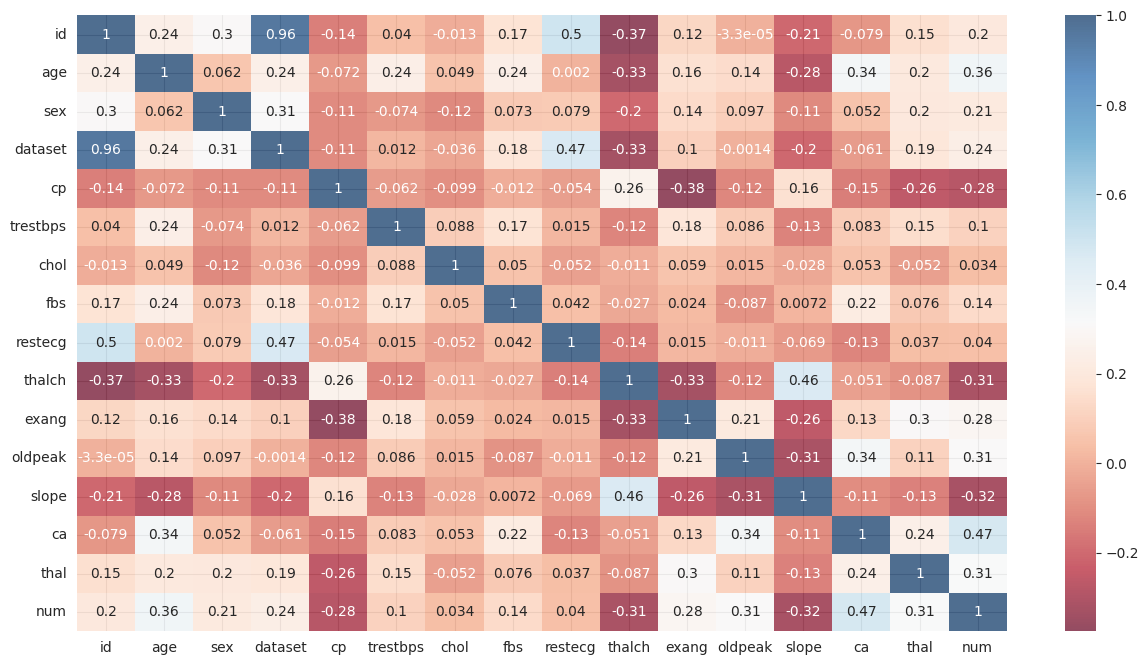

In [ ]:
# plot correlation matrix after converting categorical columns to numerical
# convert categorical columns to numerical using label encoding
df2 = df.copy()
sns.set_palette("pastel")
cat_cols = df2.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    df2[col] = LabelEncoder().fit_transform(df2[col])


correlation_matrix = df2.corr()
sort_corr_features = correlation_matrix.index
#plot correlation matrix
plt.figure(figsize=(15, 8))
sns.heatmap(df2[sort_corr_features].corr(), annot=True, cmap='RdBu', alpha=0.7, square=False)
plt.show()

In [ ]:
# calculate the correlation of each feature with the target variable and sort in descending order
correlation = correlation_matrix['num'].sort_values(ascending=False)
print_heading('Correlation of each feature with the target variable')
correlation

--------------------------------------------------
CORRELATION OF EACH FEATURE WITH THE TARGET VARIABLE
--------------------------------------------------


num         1.000000
ca          0.474826
age         0.356136
thal        0.314848
oldpeak     0.308053
exang       0.283368
dataset     0.236567
sex         0.206785
id          0.199244
fbs         0.139830
trestbps    0.102831
restecg     0.039627
chol        0.033815
cp         -0.283804
thalch     -0.314428
slope      -0.319686
Name: num, dtype: float64

In [ ]:
columns_to_drop = ["id", "dataset"]


df2 = df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1352 entries, 0 to 797
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1352 non-null   float64
 1   sex       1352 non-null   float64
 2   cp        1352 non-null   float64
 3   trestbps  1352 non-null   float64
 4   chol      1352 non-null   float64
 5   fbs       1352 non-null   float64
 6   restecg   1352 non-null   float64
 7   thalch    1352 non-null   float64
 8   exang     1352 non-null   float64
 9   oldpeak   1352 non-null   float64
 10  slope     1352 non-null   float64
 11  ca        1352 non-null   float64
 12  thal      1352 non-null   float64
 13  num       1352 non-null   int64  
dtypes: float64(13), int64(1)
memory usage: 158.4 KB


In [ ]:
features = df.drop(columns=["num"])  # Features are all columns except 'num'
target = df["num"]  # 'num' column is the target variable

print("Features shape:", features.shape)
print("Target shape:", target.shape)

Features shape: (1352, 13)
Target shape: (1352,)


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
)
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier  # Import LightGBM
from sklearn.feature_selection import f_classif, chi2, mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
import matplotlib.pyplot as plt

# Handling outliers
scaler = RobustScaler()  # You can choose any appropriate scaler like RobustScaler, StandardScaler, or MinMaxScaler
X_scaled = scaler.fit_transform(features)

# Splitting the scaled data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, target, test_size=0.2, random_state=40, shuffle=True)  # , random_state=40, shuffle=True, stratify=df['ca']

# Define a dictionary to store model accuracies
model_accuracies = {}

# Initialize and train each model
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "SVM": SVC(max_iter=1000),
    "k-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Neural Network": MLPClassifier(max_iter=10000),
    "XGBoost": XGBClassifier(),
    "LightGBM": LGBMClassifier()  # Add LightGBM to the models dictionary
}

# SelectKBest feature selection
k_values = ['all']  # Define k values for feature selection
scoring_functions = ['f_classif', 'chi2', 'mutual_info_classif']  # Define scoring functions for SelectKBest

# Define lists to store metrics
precision_scores = []
recall_scores = []
f1_scores = []
accuracy_scores = []
auc_scores = []

# Perform cross-validation for each model with feature selection and hyperparameter tuning
for name, model in models.items():
    # Create pipeline with feature selection and model
    pipeline = Pipeline([
        ('selector', SelectKBest(score_func=f_classif)),
        ('model', model)
    ])

    # Define parameter grid for grid search
    param_grid = {
        'selector__k': k_values,
    }

    # For mutual_info_classif, create a custom scoring function
    if 'mutual_info_classif' in scoring_functions:
        param_grid['selector__score_func'] = [mutual_info_classif]

    # Perform grid search with 10-fold cross-validation
    grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='accuracy', error_score='raise')
    grid_search.fit(X_train, Y_train)

    # Extract best model from grid search
    best_model = grid_search.best_estimator_

    # Calculate cross-validation accuracy
    scores = cross_val_score(best_model, X_train, Y_train, cv=10)
    accuracy = scores.mean()
    model_accuracies[name] = accuracy

    # Print cross-validation accuracy
    print(f"{name} Cross-Validation Accuracy: {accuracy}")
    # Fit the best model
    best_model.fit(X_train, Y_train)

    # Predict on the test set
    y_pred = best_model.predict(X_test)

    # Calculate precision
    precision = precision_score(Y_test, y_pred)
    # Calculate recall
    recall = recall_score(Y_test, y_pred)
    # Calculate F1-score
    f1 = f1_score(Y_test, y_pred)
    # Calculate AUC
    if hasattr(best_model, "predict_proba"):
        y_proba = best_model.predict_proba(X_test)[:, 1]
    else:
        y_proba = best_model.decision_function(X_test)
    auc = roc_auc_score(Y_test, y_proba)

    # Append scores to lists
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    auc_scores.append(auc)

# Finding the best model (highest accuracy)
best_model_name = max(model_accuracies, key=model_accuracies.get)
best_model_accuracy = model_accuracies[best_model_name]
print(f"\nBest Model: {best_model_name} with Cross-Validation Accuracy: {best_model_accuracy}")

# Calculate evaluation metrics for the best model
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score

# Fit the best model
best_model.fit(X_train, Y_train)

# Predict on the test set
y_pred = best_model.predict(X_test)

# Calculate precision
precision = precision_score(Y_test, y_pred)
# Calculate recall
recall = recall_score(Y_test, y_pred)
# Calculate F1-score
f1 = f1_score(Y_test, y_pred)
# Calculate accuracy
accuracy = accuracy_score(Y_test, y_pred)

# Calculate AUC
if hasattr(best_model, "predict_proba"):
    y_proba = best_model.predict_proba(X_test)[:, 1]
else:
    y_proba = best_model.decision_function(X_test)
auc = roc_auc_score(Y_test, y_proba)

# Create summary table
summary_table = pd.DataFrame({
    "Model": [best_model_name],
    "Accuracy": [accuracy],
    "Precision": [precision],
    "Recall": [recall],
    "F1-score": [f1],
    "AUC": [auc]
})

# Display summary table
print(summary_table)


# Create summary table
summary_table = pd.DataFrame(
    {
        "Model": list(models.keys()),
        "Cross-Validation Accuracy": list(model_accuracies.values()),
        "Precision": precision_scores,
        "Recall": recall_scores,
        "F1-score": f1_scores,
        "AUC": auc_scores,
    }
)

# Display summary table
print("_" * 60)
print(summary_table)
print("_" * 60)


# Finding the best model (highest accuracy)
best_model_name = max(model_accuracies, key=model_accuracies.get)
best_model_accuracy = model_accuracies[best_model_name]
print(f"\nBest Model: {best_model_name} with Cross-Validation Accuracy: {best_model_accuracy}")

Logistic Regression Cross-Validation Accuracy: 0.765970098538906
Decision Tree Cross-Validation Accuracy: 0.8788141352361535
Random Forest Cross-Validation Accuracy: 0.9158171933401291
Gradient Boosting Cross-Validation Accuracy: 0.8519622833843018
AdaBoost Cross-Validation Accuracy: 0.8195973496432213
SVM Cross-Validation Accuracy: 0.8038566089024805
k-Nearest Neighbors Cross-Validation Accuracy: 0.793688413183826
Naive Bayes Cross-Validation Accuracy: 0.7770387359836901
Neural Network Cross-Validation Accuracy: 0.8852786272511043
XGBoost Cross-Validation Accuracy: 0.9093442065919131
[LightGBM] [Info] Number of positive: 485, number of negative: 487
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000235 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 338
[LightGBM] [Info] Number of data points in the train set: 972, number of used feat

In [ ]:
summary_table

,Model,Cross-Validation Accuracy,Precision,Recall,F1-score,AUC
0,Logistic Regression,0.765970,0.812030,0.788321,0.800000,0.899989
1,Decision Tree,0.878814,0.935714,0.956204,0.945848,0.944520
2,Random Forest,0.915817,0.909722,0.956204,0.932384,0.985184
3,Gradient Boosting,0.851962,0.875912,0.875912,0.875912,0.952555
4,AdaBoost,0.819597,0.841727,0.854015,0.847826,0.933626
5,SVM,0.803857,0.838028,0.868613,0.853047,0.918455
6,k-Nearest Neighbors,0.793688,0.821918,0.875912,0.848057,0.907016
7,Naive Bayes,0.777039,0.802817,0.832117,0.817204,0.898736
8,Neural Network,0.885279,0.867550,0.956204,0.909722,0.940571
9,XGBoost,0.909344,0.903448,0.956204,0.929078,0.977939


In [ ]:
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    accuracy_score,
    roc_auc_score,
)
from xgboost import XGBClassifier  # Import XGBoost
from lightgbm import LGBMClassifier  # Import LightGBM

# Define models including XGBoost and LightGBM
models = [
    LogisticRegression(max_iter=1000),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    AdaBoostClassifier(),
    SVC(max_iter=1000, probability=True),
    KNeighborsClassifier(),
    GaussianNB(),
    MLPClassifier(max_iter=10000),
    XGBClassifier(),  # Include XGBoost here
    LGBMClassifier(),  # Include LightGBM here
]

# Define lists to store metrics
precision_scores = []
recall_scores = []
f1_scores = []
accuracy_scores = []
auc_scores = []

# Calculate metrics for each model
for model in models:
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)

    precision = precision_score(Y_test, y_pred)
    recall = recall_score(Y_test, y_pred)
    f1 = f1_score(Y_test, y_pred)
    accuracy = accuracy_score(Y_test, y_pred)

    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_proba = model.decision_function(X_test)

    auc = roc_auc_score(Y_test, y_proba)

    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    accuracy_scores.append(accuracy)
    auc_scores.append(auc)

# Create summary table
summary_table = pd.DataFrame(
    {
        "Model": [
            "Logistic Regression",
            "Decision Tree",
            "Random Forest",
            "Gradient Boosting",
            "AdaBoost",
            "SVM",
            "k-Nearest Neighbors",
            "Naive Bayes",
            "Neural Network",
            "XGBoost",
            "LightGBM",  # Add LightGBM here
        ],
        "Accuracy": accuracy_scores,
        "Precision": precision_scores,
        "Recall": recall_scores,
        "F1-score": f1_scores,
        "AUC": auc_scores,
    }
)

# Display summary table
print(summary_table)


[LightGBM] [Info] Number of positive: 539, number of negative: 542
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000301 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 350
[LightGBM] [Info] Number of data points in the train set: 1081, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498612 -> initscore=-0.005550
[LightGBM] [Info] Start training from score -0.005550
                  Model  Accuracy  Precision    Recall  F1-score       AUC
0   Logistic Regression  0.800738   0.812030  0.788321  0.800000  0.899989
1         Decision Tree  0.955720   0.943262  0.970803  0.956835  0.955551
2         Random Forest  0.929889   0.915493  0.948905  0.931900  0.988180
3     Gradient Boosting  0.874539   0.875912  0.875912  0.875912  0.952555
4              AdaBoost  0.845018   0.841727  0.854015  0.847826  0.93362

In [ ]:
summary_table

,Model,Accuracy,Precision,Recall,F1-score,AUC
0,Logistic Regression,0.800738,0.812030,0.788321,0.800000,0.899989
1,Decision Tree,0.955720,0.943262,0.970803,0.956835,0.955551
2,Random Forest,0.929889,0.915493,0.948905,0.931900,0.988180
3,Gradient Boosting,0.874539,0.875912,0.875912,0.875912,0.952555
4,AdaBoost,0.845018,0.841727,0.854015,0.847826,0.933626
5,SVM,0.848708,0.838028,0.868613,0.853047,0.918401
6,k-Nearest Neighbors,0.841328,0.821918,0.875912,0.848057,0.907016
7,Naive Bayes,0.811808,0.802817,0.832117,0.817204,0.898736
8,Neural Network,0.918819,0.891156,0.956204,0.922535,0.958274
9,XGBoost,0.926199,0.903448,0.956204,0.929078,0.977939


[LightGBM] [Info] Number of positive: 539, number of negative: 542
[LightGBM] [Info] Total Bins 350
[LightGBM] [Info] Number of data points in the train set: 1081, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498612 -> initscore=-0.005550
[LightGBM] [Info] Start training from score -0.005550


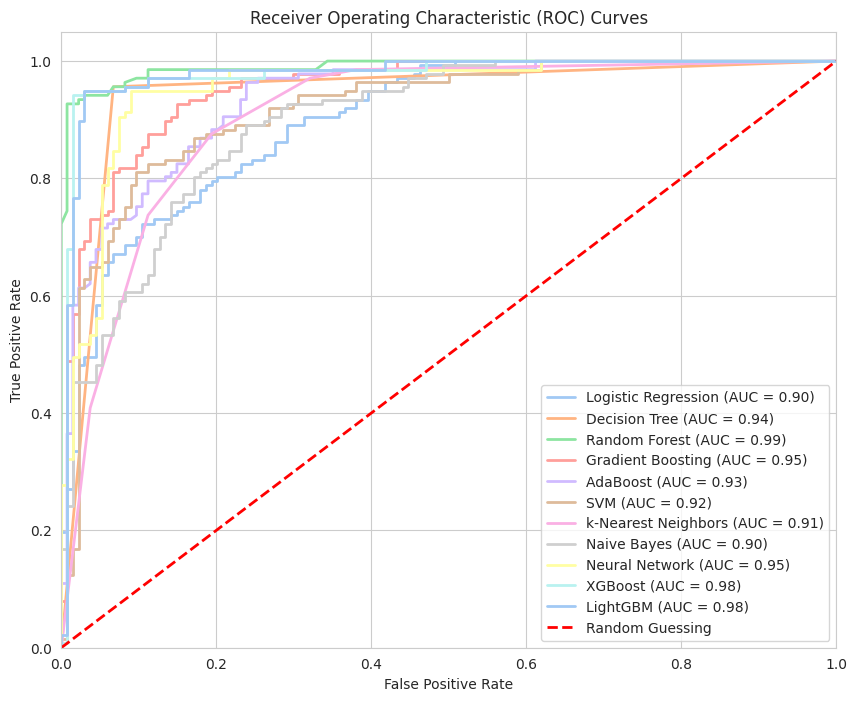

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
)
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier  # Import XGBoost
from lightgbm import LGBMClassifier  # Import LightGBM

# Define classifiers with increased maximum number of iterations
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "SVM": SVC(probability=True, max_iter=1000),
    "k-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Neural Network": MLPClassifier(max_iter=10000),
    "XGBoost": XGBClassifier(),  # Add XGBoost to the classifiers dictionary
    "LightGBM": LGBMClassifier(force_row_wise=True)  # Add LightGBM to the classifiers dictionary
}

# Plot ROC curve for each classifier
plt.figure(figsize=(10, 8))
for name, model in classifiers.items():
    model.fit(X_train, Y_train)
    if hasattr(model, "decision_function"):
        probas_ = model.decision_function(X_test)
    else:
        probas_ = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(Y_test, probas_)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Random Guessing")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curves")
plt.legend(loc="lower right")
plt.show()


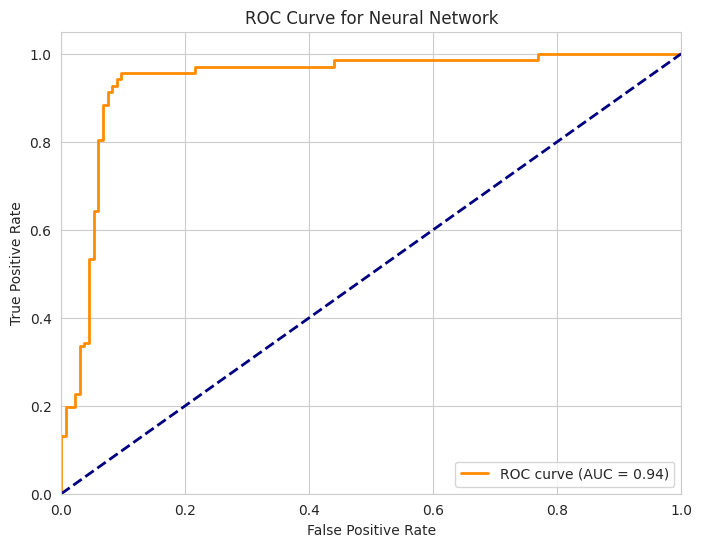

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Initialize and train the Neural Network model
neural_network_model = MLPClassifier(max_iter=10000)
neural_network_model.fit(X_train, Y_train)

# Calculate the probabilities for the positive class
probabilities = neural_network_model.predict_proba(X_test)[:, 1]

# Compute the false positive rate (fpr) and true positive rate (tpr)
fpr, tpr, _ = roc_curve(Y_test, probabilities)

# Compute the area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label="ROC curve (AUC = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Neural Network")
plt.legend(loc="lower right")
plt.show()

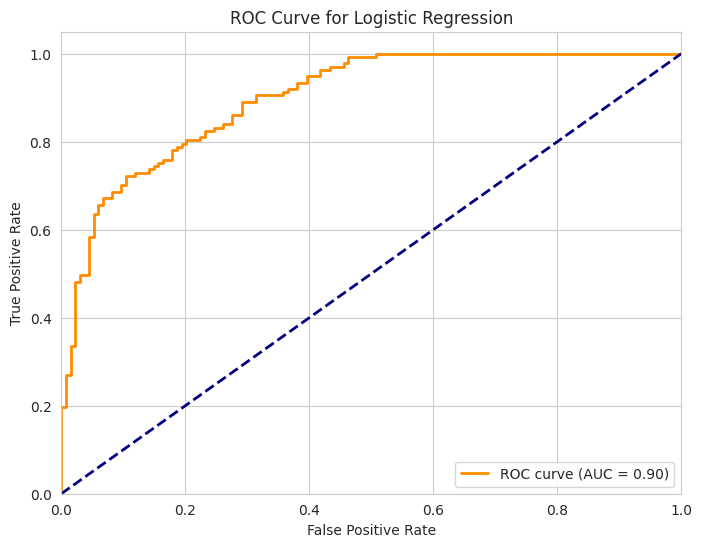

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Initialize and train the Logistic Regression model
logistic_regression_model = LogisticRegression(max_iter=1000)
logistic_regression_model.fit(X_train, Y_train)

# Calculate the probabilities for the positive class
probabilities = logistic_regression_model.predict_proba(X_test)[:, 1]

# Compute the false positive rate (fpr) and true positive rate (tpr)
fpr, tpr, _ = roc_curve(Y_test, probabilities)

# Compute the area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label="ROC curve (AUC = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Logistic Regression")
plt.legend(loc="lower right")
plt.show()

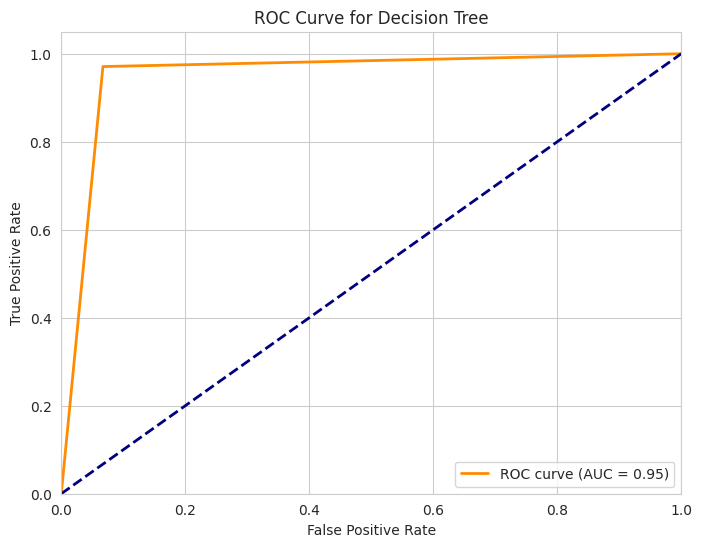

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Initialize and train the Decision Tree model
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, Y_train)

# Calculate the probabilities for the positive class
probabilities = decision_tree_model.predict_proba(X_test)[:, 1]

# Compute the false positive rate (fpr) and true positive rate (tpr)
fpr, tpr, _ = roc_curve(Y_test, probabilities)

# Compute the area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label="ROC curve (AUC = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Decision Tree")
plt.legend(loc="lower right")
plt.show()

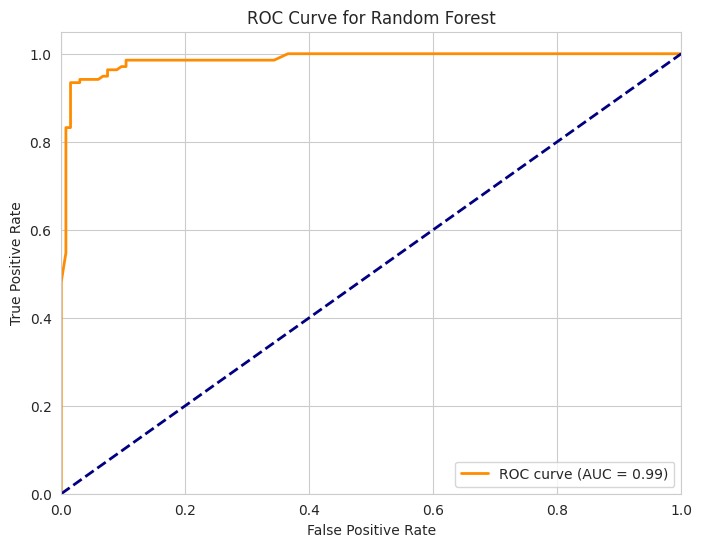

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Initialize and train the Random Forest model
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, Y_train)

# Calculate the probabilities for the positive class
probabilities = random_forest_model.predict_proba(X_test)[:, 1]

# Compute the false positive rate (fpr) and true positive rate (tpr)
fpr, tpr, _ = roc_curve(Y_test, probabilities)

# Compute the area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label="ROC curve (AUC = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Random Forest")
plt.legend(loc="lower right")
plt.show()

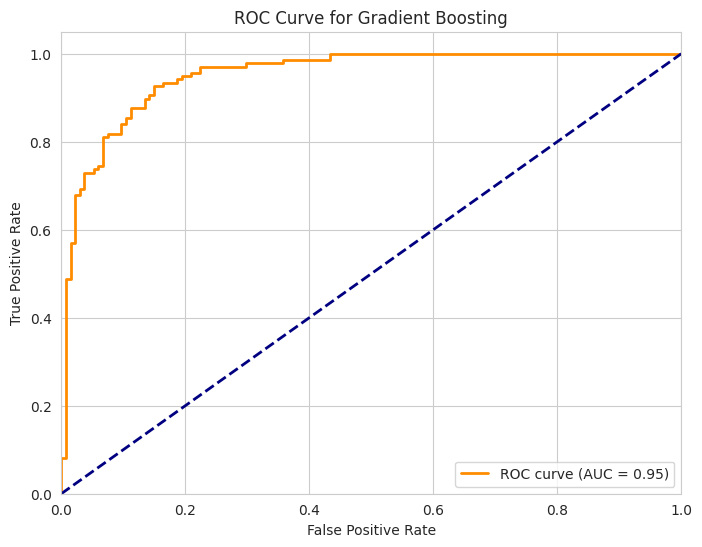

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Initialize and train the Gradient Boosting model
gradient_boosting_model = GradientBoostingClassifier()
gradient_boosting_model.fit(X_train, Y_train)

# Calculate the probabilities for the positive class
probabilities = gradient_boosting_model.predict_proba(X_test)[:, 1]

# Compute the false positive rate (fpr) and true positive rate (tpr)
fpr, tpr, _ = roc_curve(Y_test, probabilities)

# Compute the area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label="ROC curve (AUC = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Gradient Boosting")
plt.legend(loc="lower right")
plt.show()

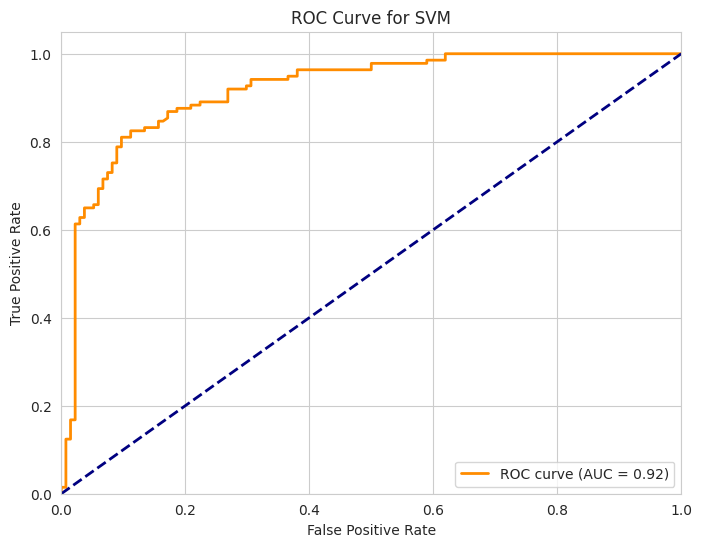

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Initialize and train the SVM model
svm_model = SVC(probability=True)
svm_model.fit(X_train, Y_train)

# Calculate the probabilities for the positive class
probabilities = svm_model.predict_proba(X_test)[:, 1]

# Compute the false positive rate (fpr) and true positive rate (tpr)
fpr, tpr, _ = roc_curve(Y_test, probabilities)

# Compute the area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label="ROC curve (AUC = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for SVM")
plt.legend(loc="lower right")
plt.show()

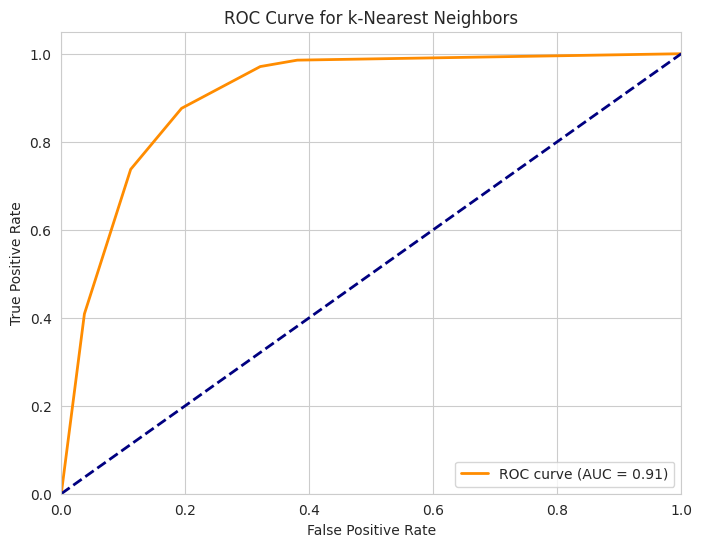

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Initialize and train the k-Nearest Neighbors model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, Y_train)

# Calculate the probabilities for the positive class
probabilities = knn_model.predict_proba(X_test)[:, 1]

# Compute the false positive rate (fpr) and true positive rate (tpr)
fpr, tpr, _ = roc_curve(Y_test, probabilities)

# Compute the area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label="ROC curve (AUC = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for k-Nearest Neighbors")
plt.legend(loc="lower right")
plt.show()

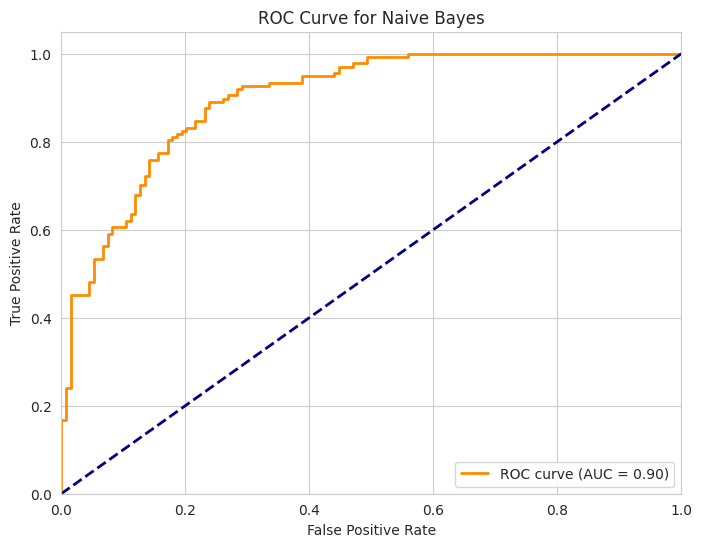

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Initialize and train the Naive Bayes model
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, Y_train)

# Calculate the probabilities for the positive class
probabilities = naive_bayes_model.predict_proba(X_test)[:, 1]

# Compute the false positive rate (fpr) and true positive rate (tpr)
fpr, tpr, _ = roc_curve(Y_test, probabilities)

# Compute the area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label="ROC curve (AUC = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Naive Bayes")
plt.legend(loc="lower right")
plt.show()

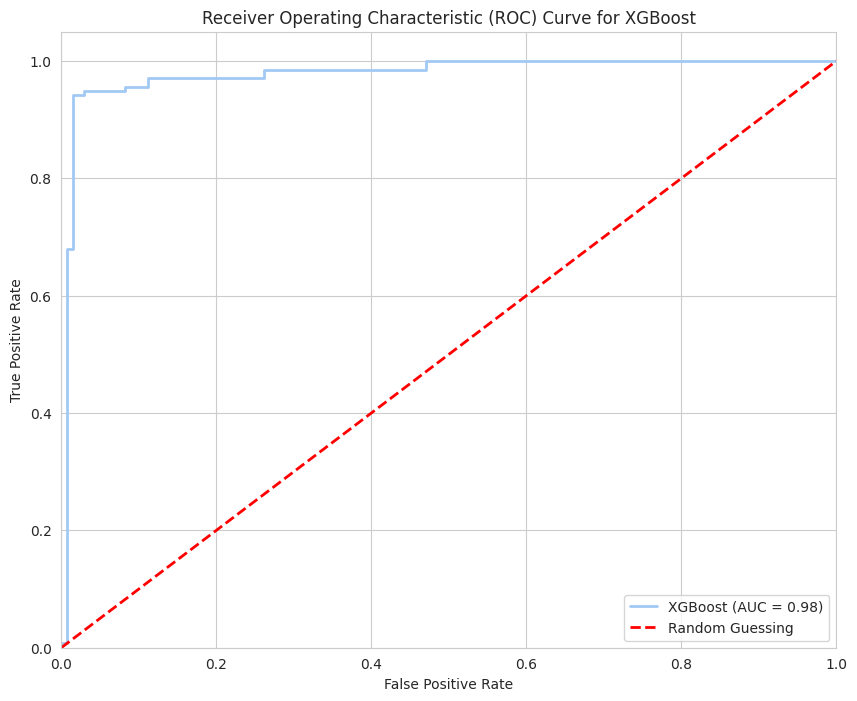

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from xgboost import XGBClassifier  # Import XGBoost

# Initialize XGBoost classifier
xgb_model = XGBClassifier()

# Fit the model
xgb_model.fit(X_train, Y_train)

# Predict probabilities
probas_ = xgb_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, probas_)
roc_auc = auc(fpr, tpr)

# Plot ROC curve for XGBoost
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, lw=2, label=f"XGBoost (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Random Guessing")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve for XGBoost")
plt.legend(loc="lower right")
plt.show()


[LightGBM] [Info] Number of positive: 539, number of negative: 542
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000289 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 350
[LightGBM] [Info] Number of data points in the train set: 1081, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498612 -> initscore=-0.005550
[LightGBM] [Info] Start training from score -0.005550


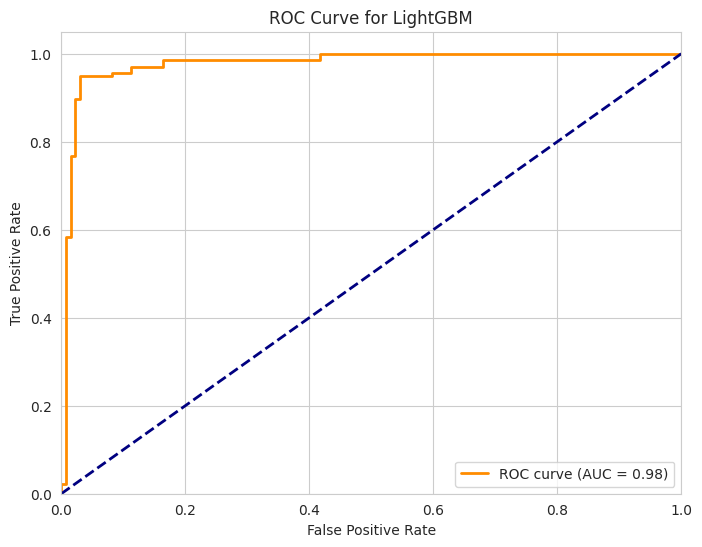

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier  # Import LightGBM

# Initialize and train the LightGBM model
lgbm_model = LGBMClassifier()
lgbm_model.fit(X_train, Y_train)

# Calculate the probabilities for the positive class
probabilities = lgbm_model.predict_proba(X_test)[:, 1]

# Compute the false positive rate (fpr) and true positive rate (tpr)
fpr, tpr, _ = roc_curve(Y_test, probabilities)

# Compute the area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label="ROC curve (AUC = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for LightGBM")
plt.legend(loc="lower right")
plt.show()


In [ ]:
!pip install lime

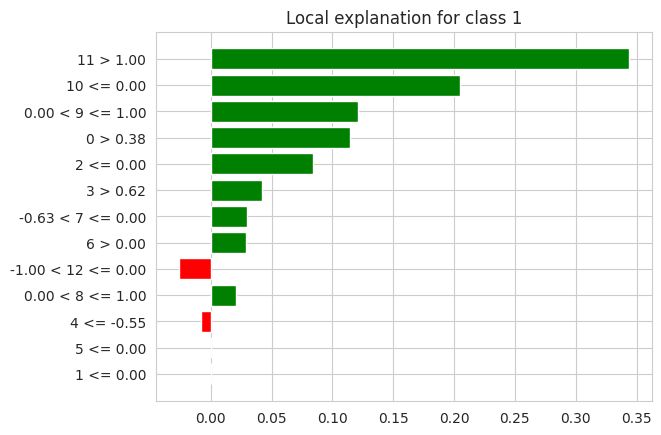

In [ ]:
from lime import lime_tabular

# Initialize Lime explainer
explainer = lime_tabular.LimeTabularExplainer(X_train, mode='classification')

# Select an instance for explanation (you can choose any index)
instance_idx = 0  # For example
instance = X_test[instance_idx]
exp = explainer.explain_instance(instance, best_model.predict_proba, num_features=len(features))

# Plot Lime explanation
exp.as_pyplot_figure()
plt.show()
